# House Prices: Advanced Regression Techniques

## 1. 팀소개
### 1) 팀명 : 데르렁팀 
#### - 장소섭외 및 그래프와 코닝튜닝  : 김명학   
#### - 간식담당 및 데이터 분석과 성능  : 조아라
#### - 팀의 진행상황 보고 및 깃헙 관리  : 기성환 


## 2. 데이터 소개
### 1) 목           표 :  집값 예측

### 2) 데이터 :
#### - 집값 예측 데이터는 미국 Ames. Iowa 지역의 데이터를 사용
#### - Train Data : 1460개 집값 데이터와 집값이 포함된 81개의 변수로 구성
#### - Test Data  : 1459개 집값 데이터와 집값이 제외된 80개의 변수로 구성

### 3) 평기기준 
#### -  Root-Mean-Squared-Error (RMSE)  
#### $RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$

### 4) 경연기간 :
#### - 시작 : 8/30/2016
#### - 마감 : 3/01/2017
#### - 참가팀 : 총 4469팀 (2018.3.13 기준)


### 5) 기타
#### - 일일 제출 제한 횟수 : 5 회 / 일
 
## 3. 진행 순서

### 1) 데이터 소개
#### - 데이터 불러오기
#### - 데이터 확인

### 2) EDA
#### - 




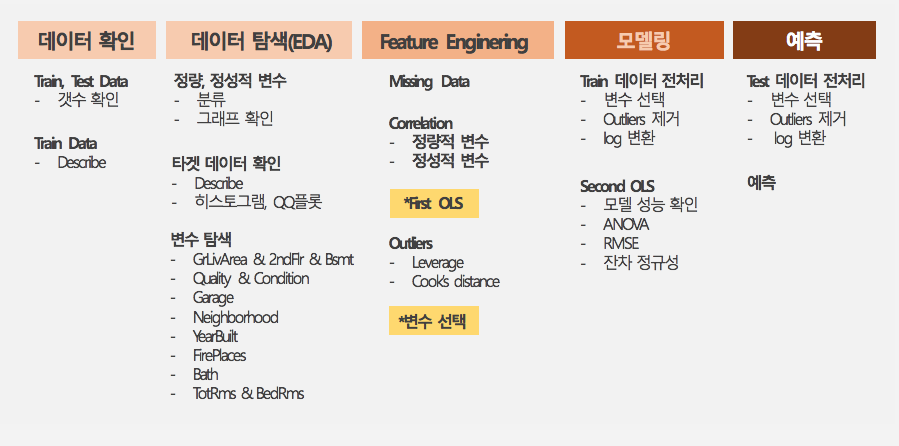

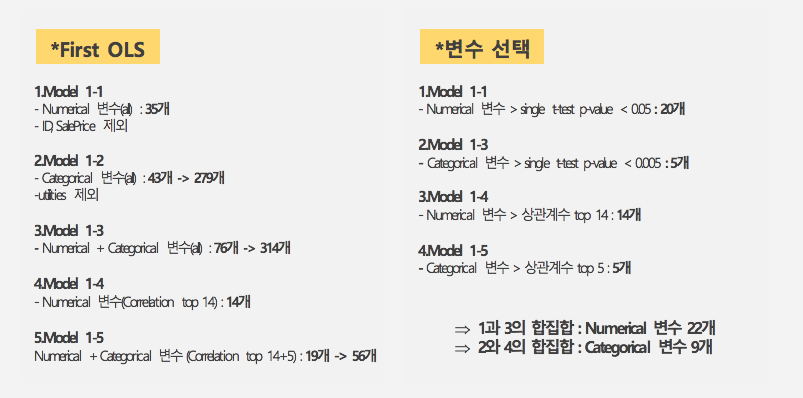

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from pandas.core import datetools
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import norm, skew 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

warnings.filterwarnings('ignore')
get_ipython().magic('matplotlib inline')

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 1. EDA 
### 1-1 데이터 소개
#### (1) 데이터 불러오기

In [4]:
train = pd.read_csv("../train.csv")
test = pd.read_csv("../test.csv")

#### (2) 데이터 갯수확인

In [3]:
print("Train data : ", train.shape)
print("Test  data : ", test.shape)

Train data :  (1460, 81)
Test  data :  (1459, 80)


#### Comment : Test 데이터에 SalePrice 열이 제외되었고 제외된 Test 데이터의 SalePrice를 예측하는 것이 이 경연대회의 목표이다

#### (3) Train 데이터 현황

In [4]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

#### Comment :
1. Count : LotFrontage, MasVnrArea 등 일부 데이터가 분실된 것을 확인 
2. Mean & 50% : 데이터가 특정값에 치우침이 있음
3. min & 25% & 50% & 75% & max : 데이터의 값이 없는 항목들이 다수 발견이 되어있음 

#### (4) 타겟 데이터 (SalePrice) 탐색

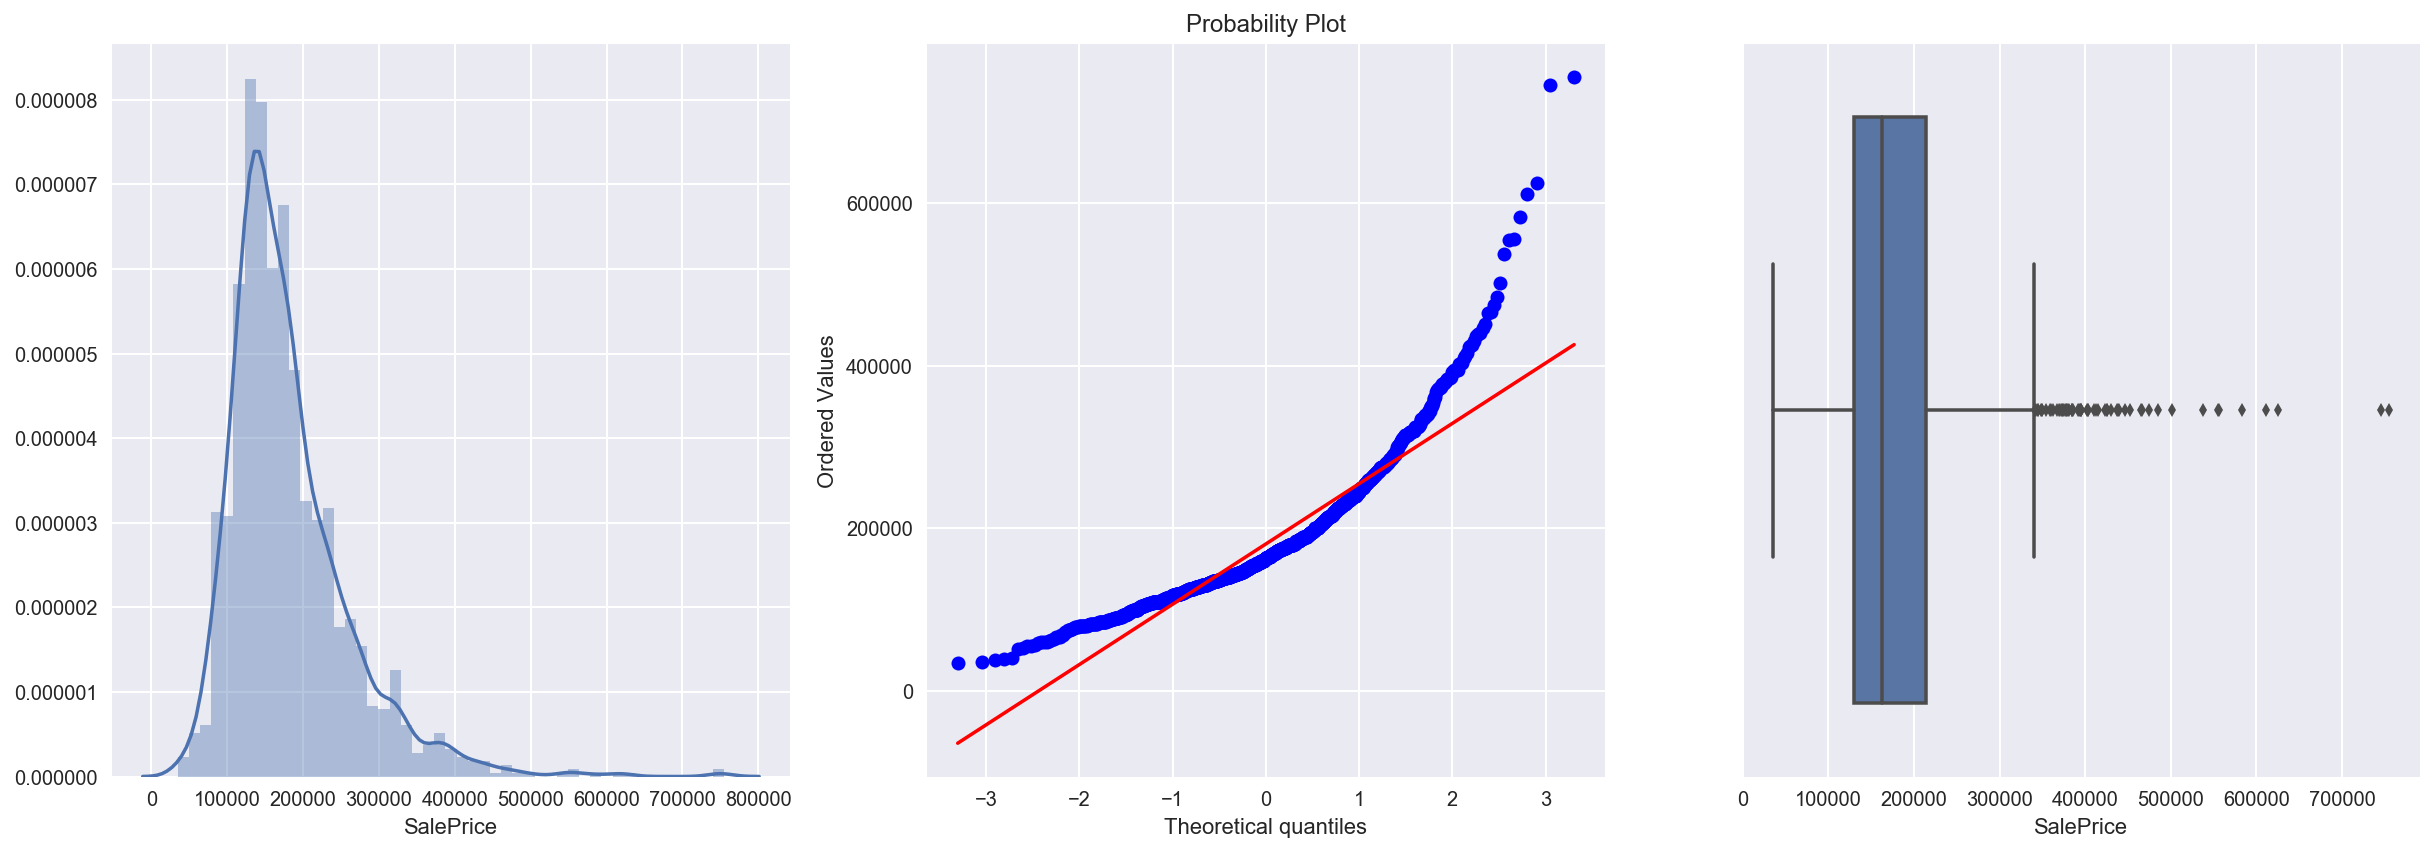

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64 

Skewness: 1.882876
Kurtosis: 6.536282


In [5]:
plt.figure(figsize=(17,6))

plt.subplot(131)
sns.distplot(train["SalePrice"])

plt.subplot(132)
stats.probplot(train["SalePrice"], plot=plt)

plt.subplot(133)
sns.boxplot(train["SalePrice"])
plt.tight_layout()
plt.show()

print(train["SalePrice"].describe(),"\n")

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

#### (5) 타겟 데이터의 정규화

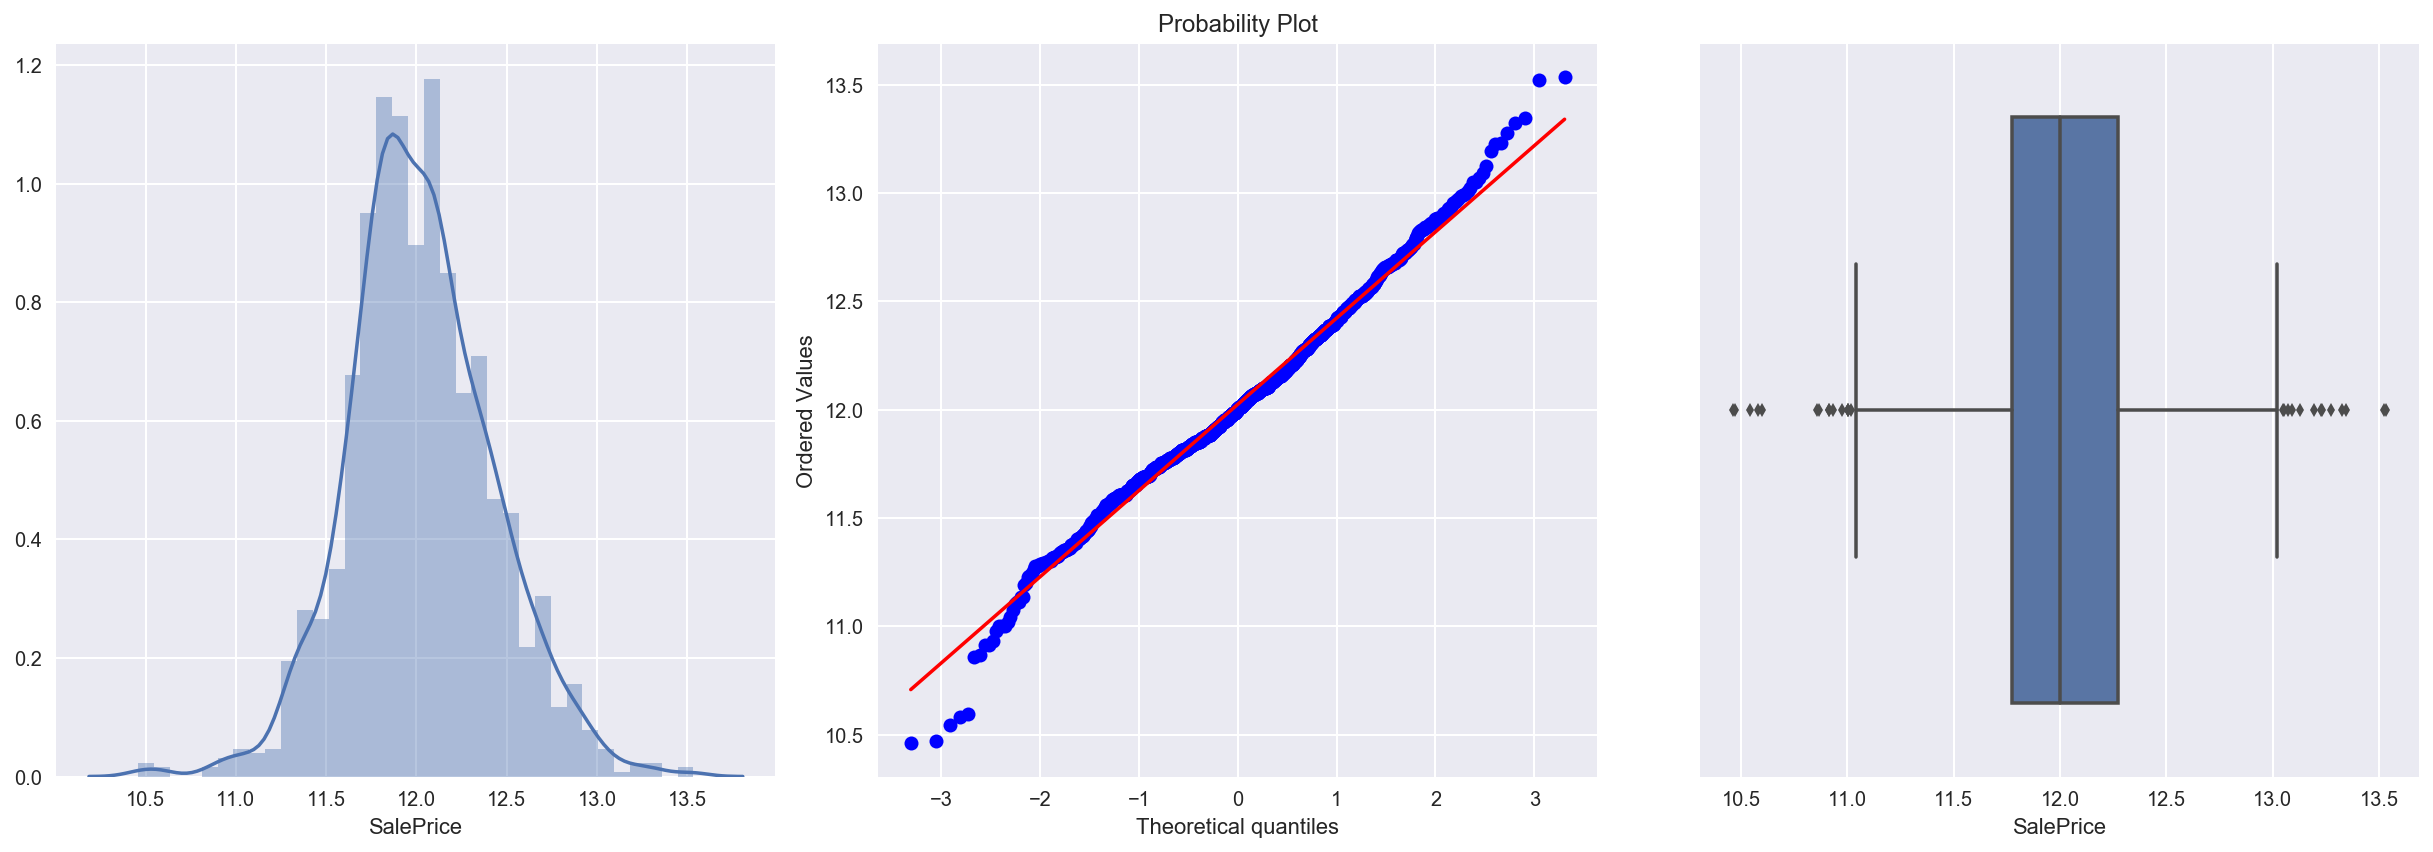

In [6]:
nomalized_SalePrice = np.log1p(train["SalePrice"])

plt.figure(figsize=(17,6))

plt.subplot(131)
sns.distplot(nomalized_SalePrice)

plt.subplot(132)
stats.probplot(nomalized_SalePrice, plot=plt)

plt.subplot(133)
sns.boxplot(nomalized_SalePrice)
plt.tight_layout()
plt.show()

#### Comment:
1. SalePrice가 왼쪽으로 데이터가 쏠림을 확인할 수 잇음
2. QQ Plot을 통해 그래프가 휘어져있음을 확인하였고 추후 모델에 넣기 전에 정규화가 필요함
3. SalePrice의 이상치를 확인할 수 있으며, 추후 제거가 필요함

### 1-2 Analysis the univariance

#### (1) Numeric 과 Catergoric 변수 분리

In [7]:
#MSSubClass 변수는 카테고리값이므로 숫자 데이터를 문자데이터로 수정 
train["MSSubClass"] = train["MSSubClass"].astype('str')

In [8]:
numerical_features = []
categorical_features = []
for f in train.columns:
    if train.dtypes[f] != 'object':
        numerical_features.append(f)
    else:
        categorical_features.append(f)

In [9]:
print("Numerical Features Qty :", len(numerical_features),"\n")
print("Numerical Features : ", numerical_features, "\n\n")
print("Categorical Features Qty :", len(categorical_features),"\n")
print("Categorical Features :", categorical_features)

Numerical Features Qty : 37 

Numerical Features :  ['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 


Categorical Features Qty : 44 

Categorical Features : ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC

#### (2) Numerical Features with SalePrice

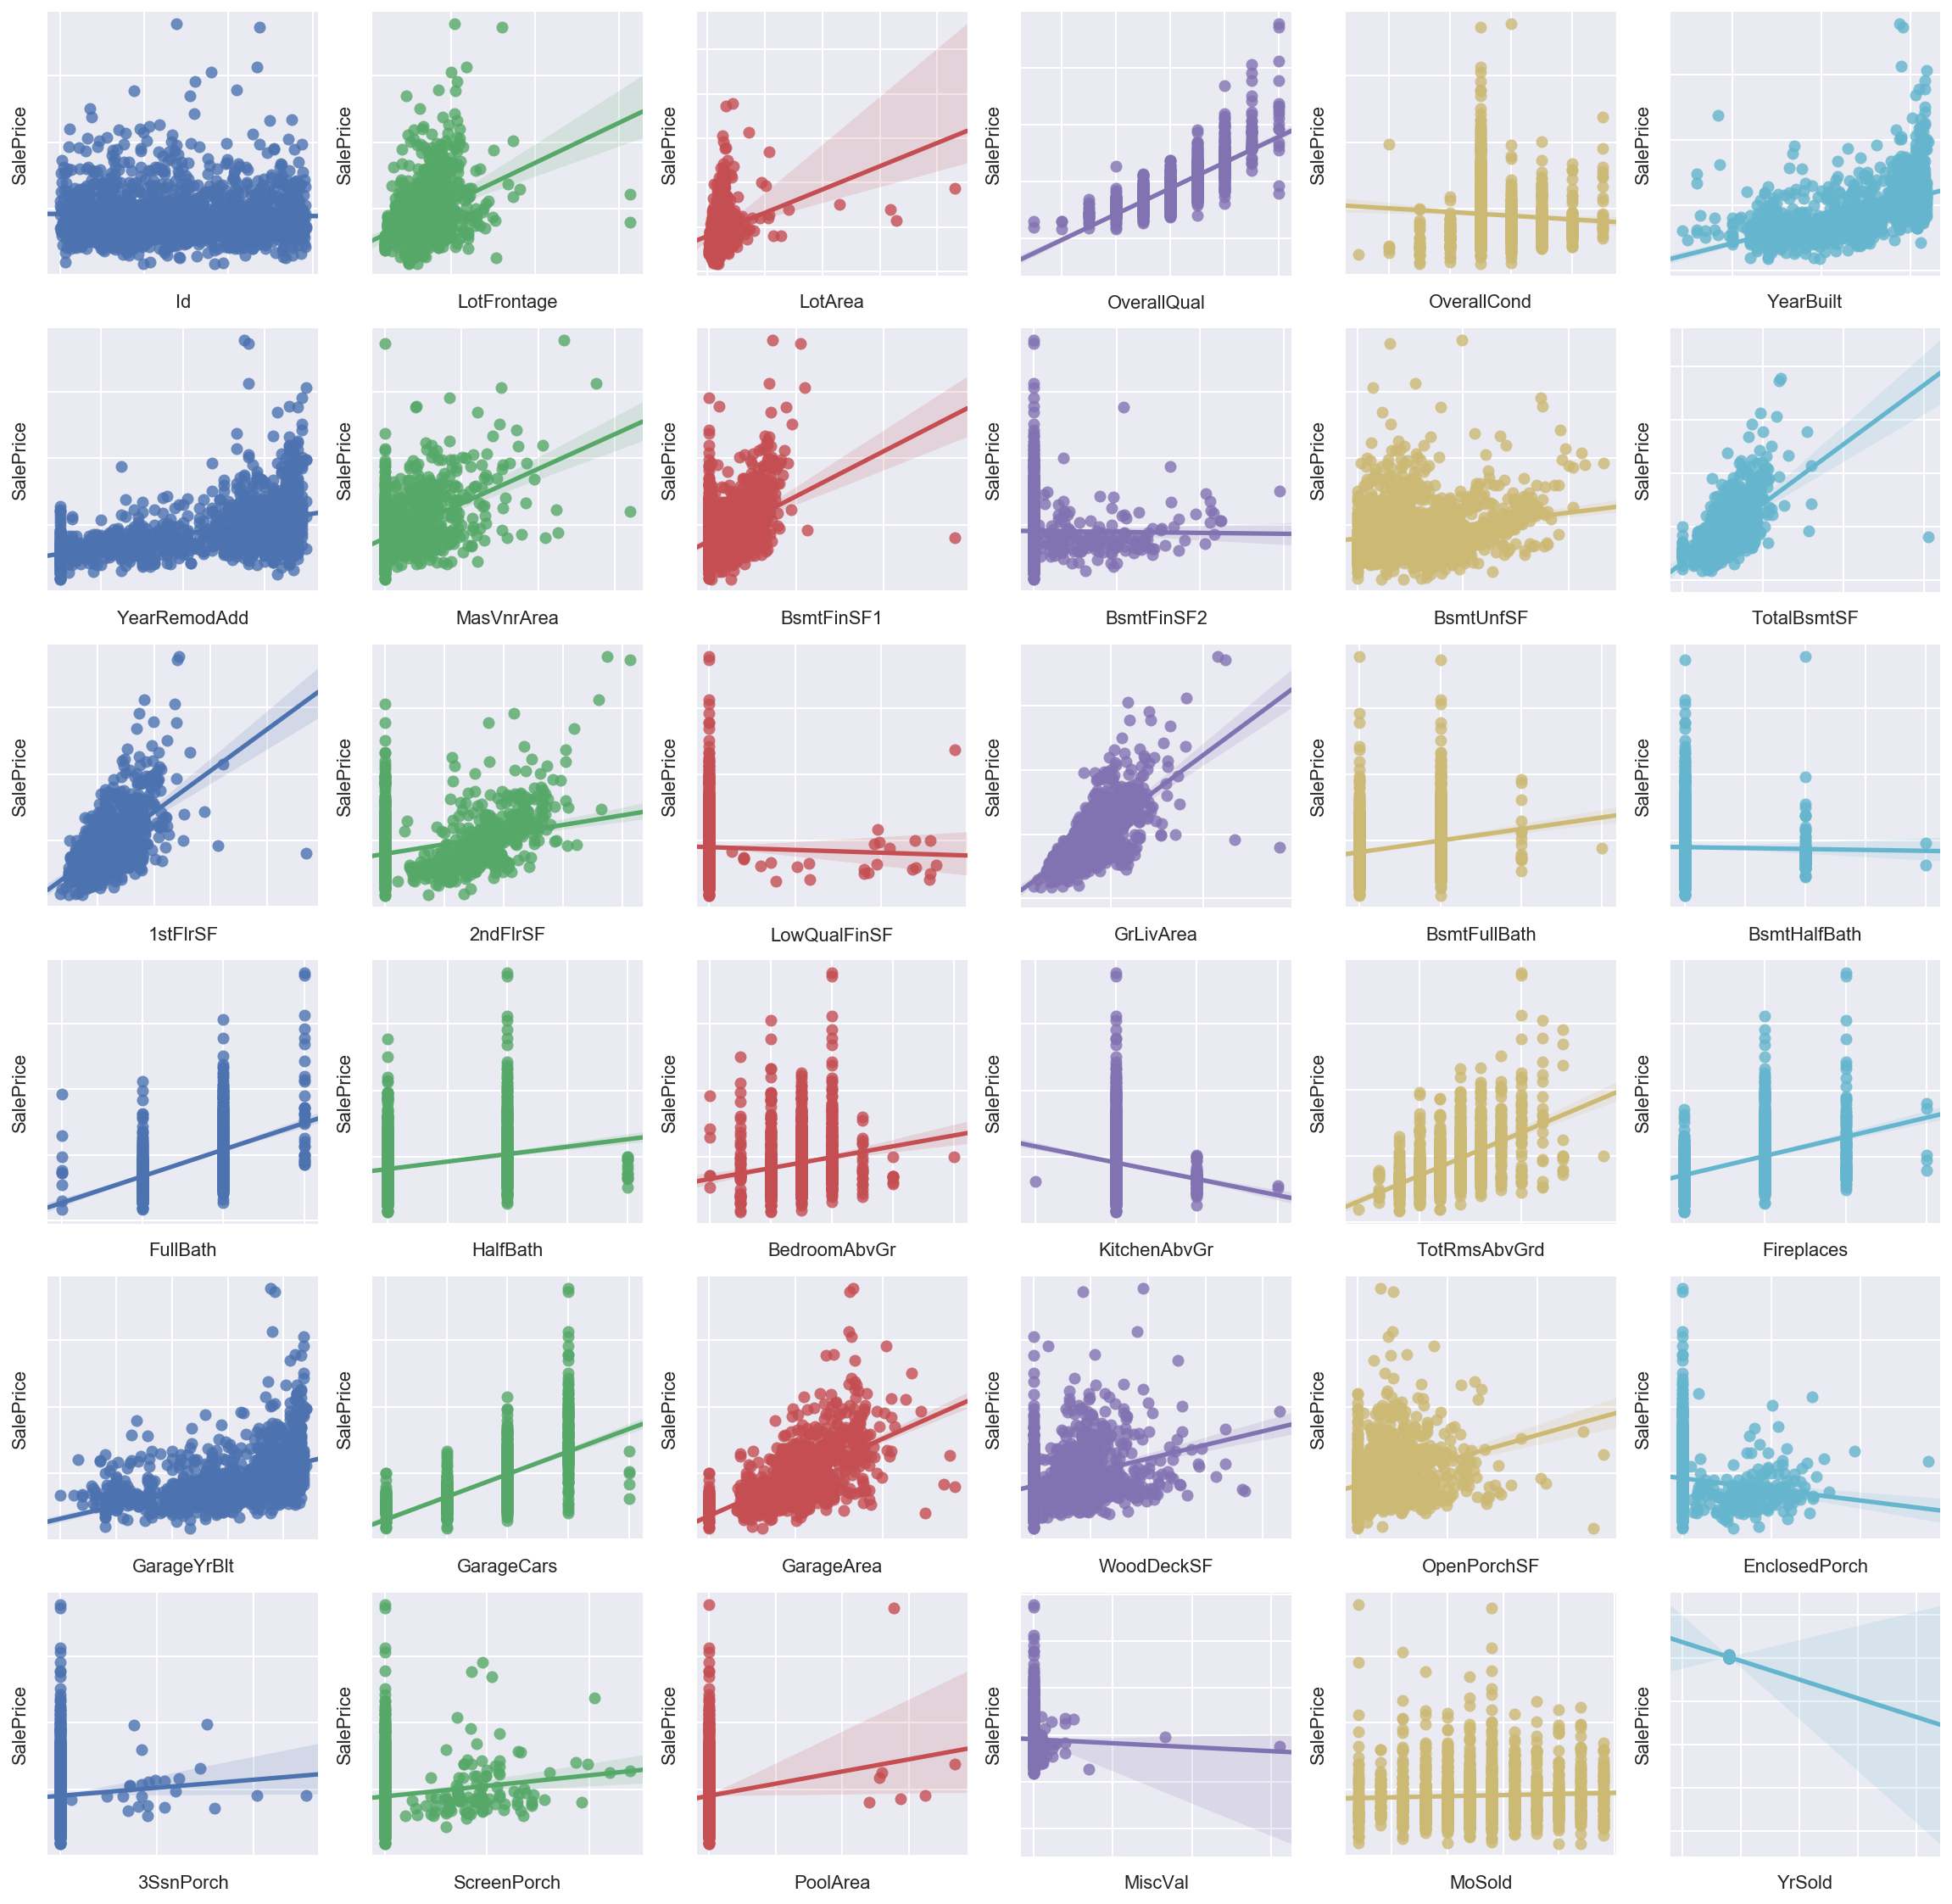

In [10]:
fig, ax = plt.subplots(6,6, figsize = (20,20))

for idx, n in enumerate(numerical_features):
    if n == 'SalePrice':
        continue
    sns.regplot(x=n, y='SalePrice', data=train, ax = ax[idx//6,idx%6])
    ax[idx//6, idx % 6].set(yticklabels=[])
    ax[idx//6, idx % 6].set(xticklabels=[])
    
    continue   

#### (3) Categorical Features with SalePrice

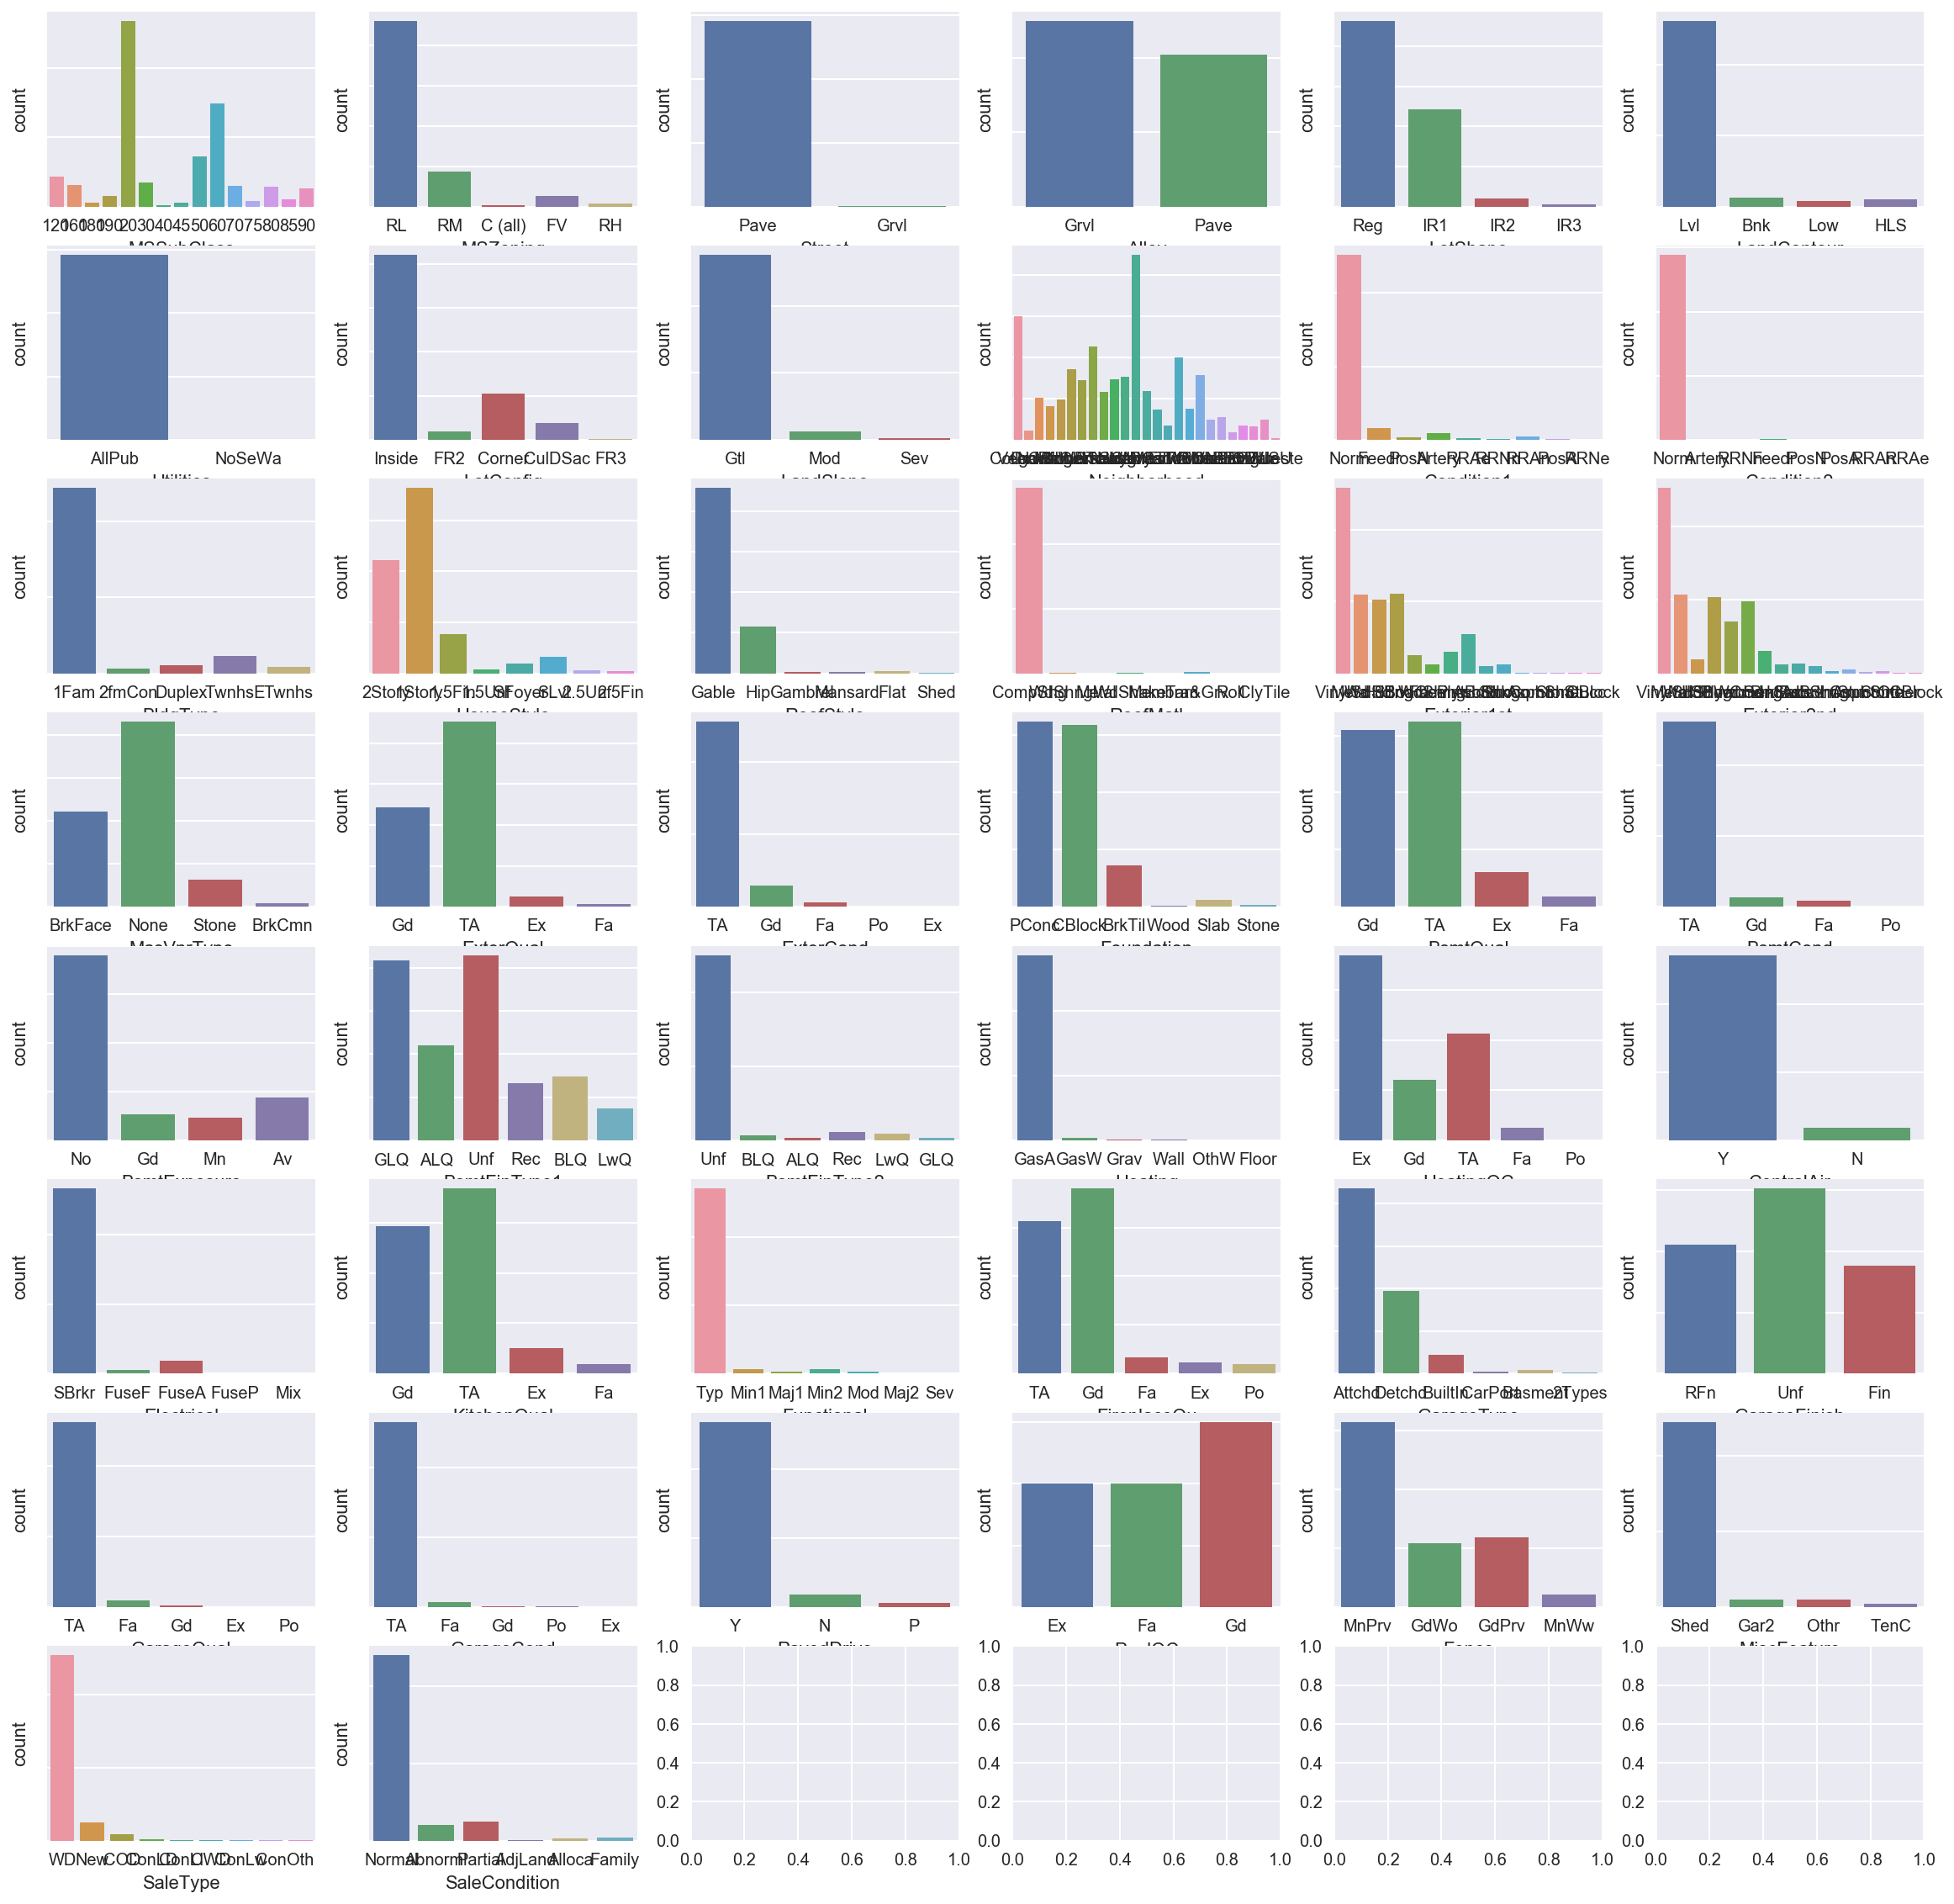

In [11]:
fig, ax = plt.subplots(8,6, figsize = (20,20))

for idx, n in enumerate(categorical_features):
    
    sns.countplot(x=n, data=train, ax = ax[idx//6, idx % 6])
    ax[idx//6, idx % 6].set(yticklabels=[])
    
    continue   

### 1-3 타겟 데이터(SalePrice)와 변수들 간의 관계

#### 1-3-1 거실 넓이와  이층 & 베이스먼트 여부

In [12]:
df_train = train.copy()
df_train["2ndFloor"] = "2ndFloor"
df_train["2ndFloor"].loc[df_train["2ndFlrSF"]==0] = "No 2ndFloor"
df_train["Basement"] = "Basement"
df_train["Basement"].loc[df_train["TotalBsmtSF"]==0] = "No Basement"

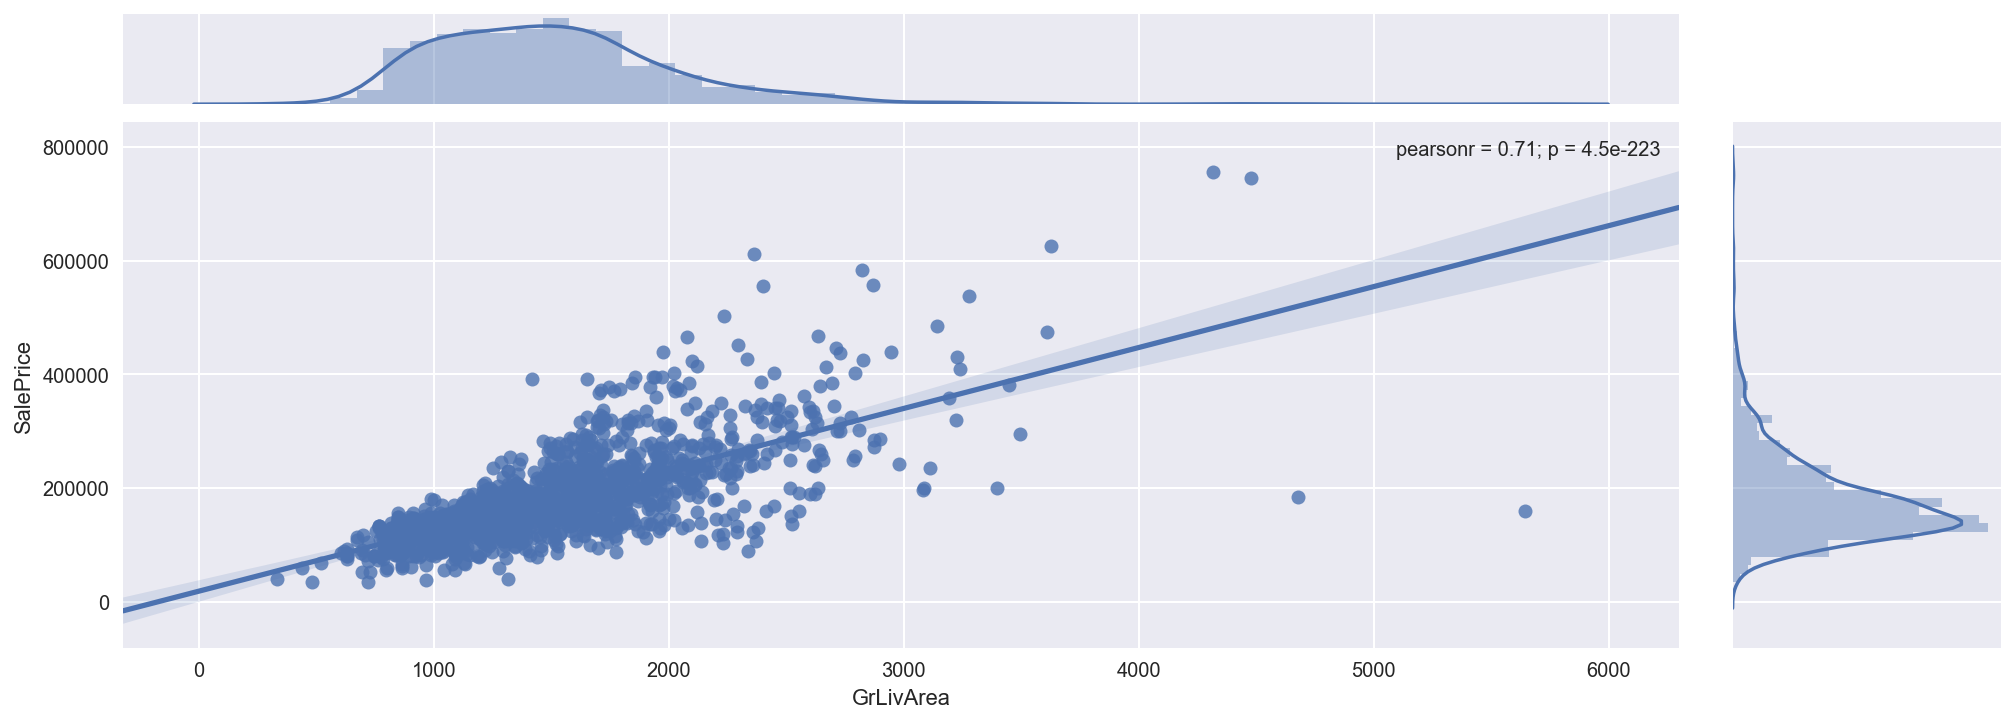

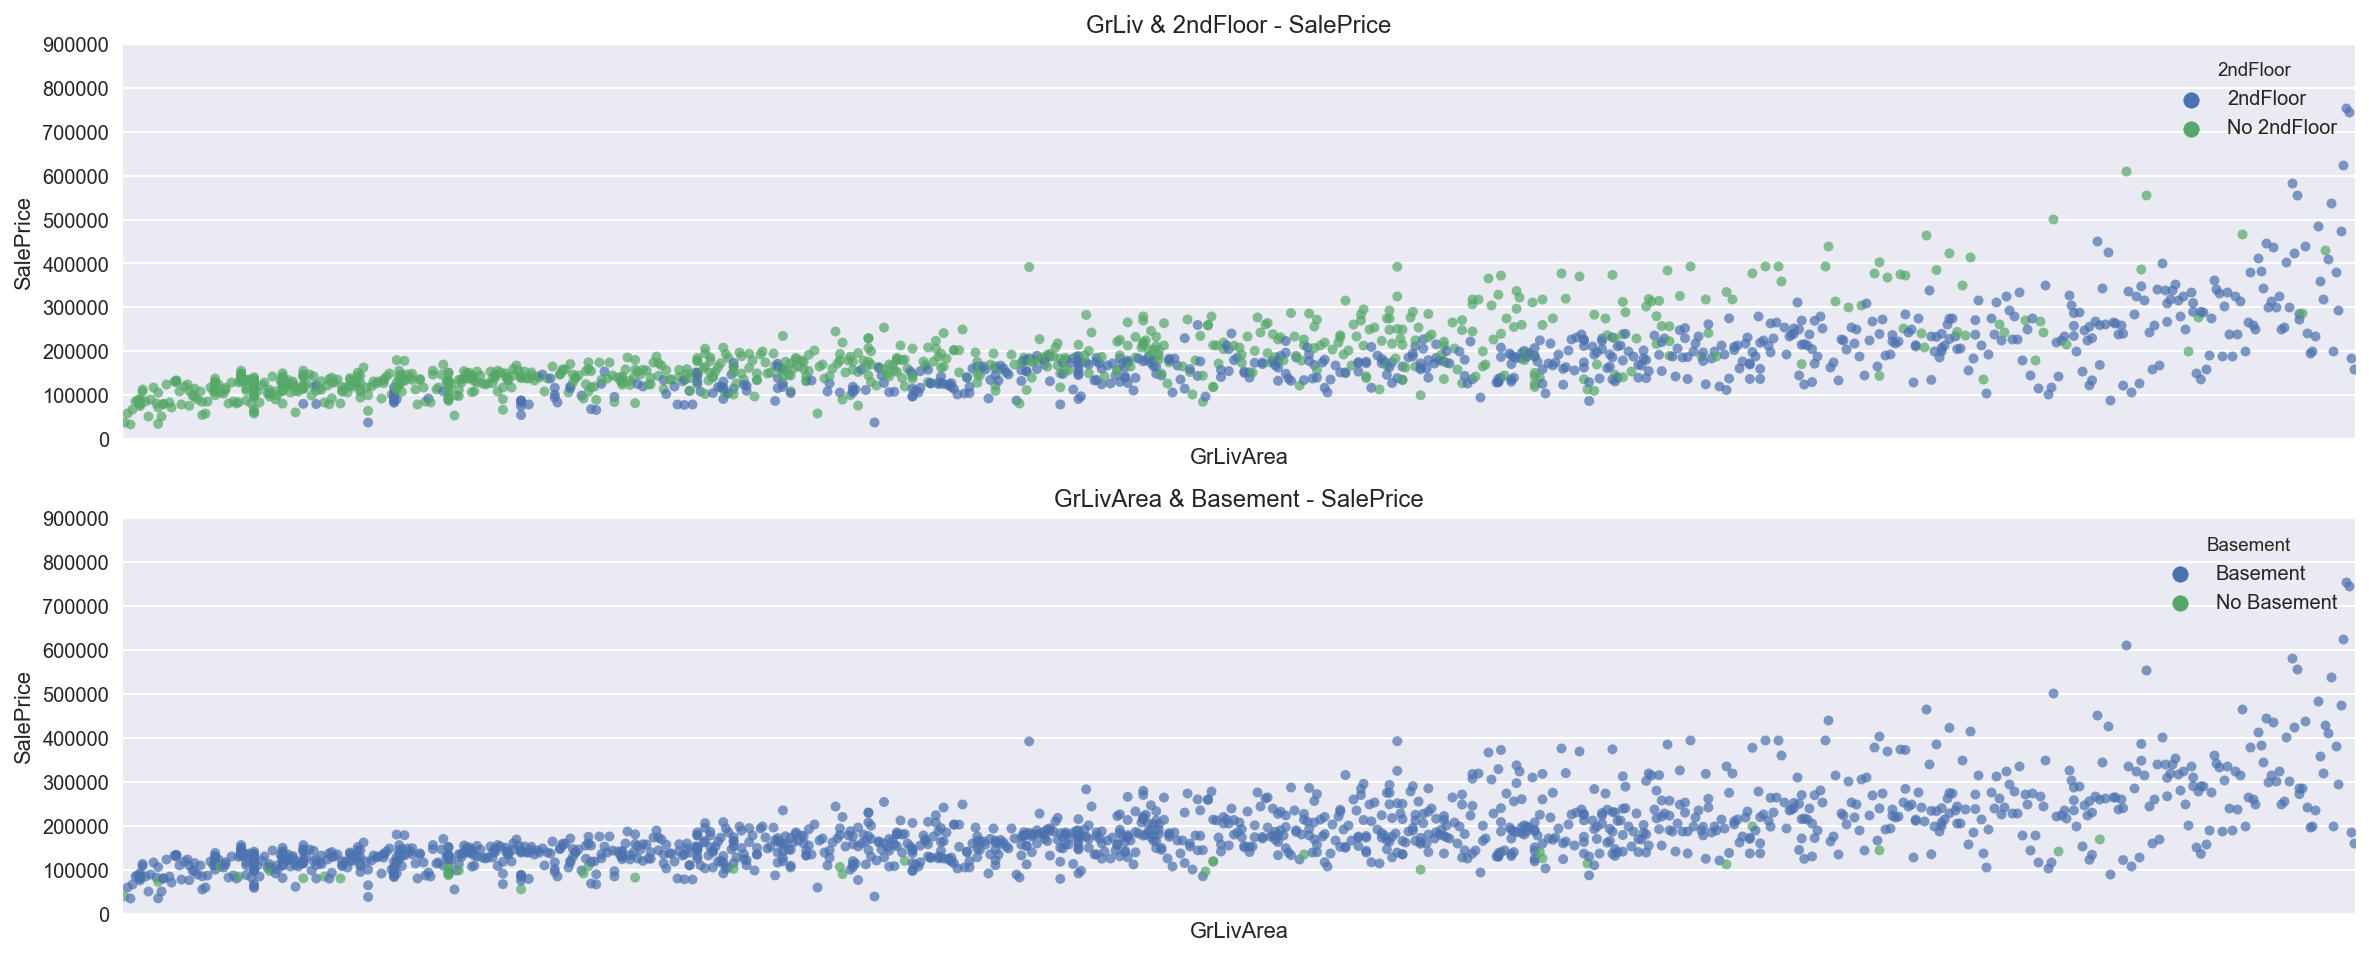

In [13]:
grid = sns.jointplot(x = "GrLivArea", y = "SalePrice", data=train, kind="reg")
grid.fig.set_size_inches(15,5)

plt.figure(figsize = (20,8))
plt.subplot(211)
g = sns.stripplot(x = "GrLivArea", y = 'SalePrice', hue = "2ndFloor", data = df_train, alpha = 0.7)
g.set_xlabel('GrLivArea')
g.set_ylabel('SalePrice')
g.set_ylim(0,900000)
g.set_xticks([])
g.set_title('GrLiv & 2ndFloor - SalePrice')

plt.subplot(212)
b = sns.stripplot( x = "GrLivArea", y = 'SalePrice', hue = "Basement", data = df_train, alpha = 0.7)
b.set_xlabel('GrLivArea')
b.set_ylabel('SalePrice')
b.set_ylim(0,900000)
b.set_title('GrLivArea & Basement - SalePrice')
b.set_xticks([])

plt.show()

#### Comments : 
1. GrLivArea는 집값에 선형관계이며, 이분산성을 갖고 있음

2. 집값이 약 20만불 이상일 경우, 2층집이 더 많으며, 베이스먼트가 없는 집들이 없음

#### 1-3-2 집의 품질과 컨디션 

Text(0.5,1,'OverallCond - SalePrice')

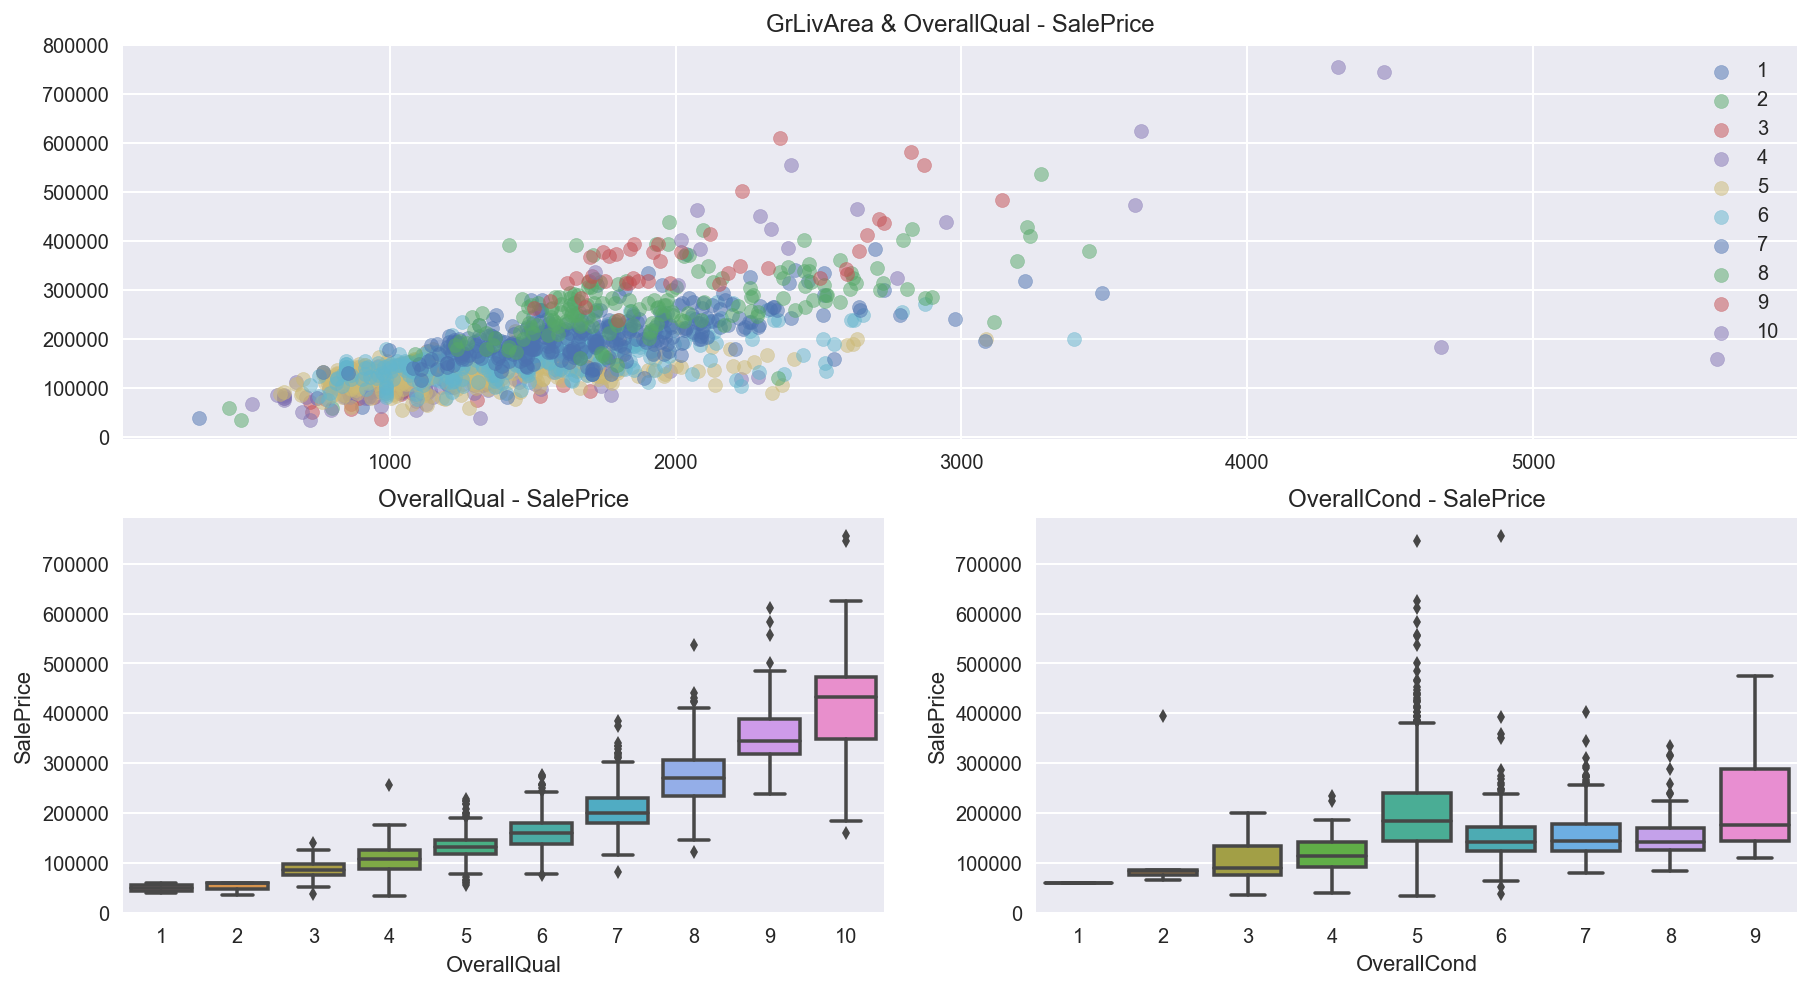

In [14]:
plt.figure(figsize=(15,8))

ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
for qual in range(1,10+1):
    index = train.OverallQual == qual
    ax1.scatter(train.GrLivArea.loc[index], train.SalePrice.loc[index], data=train, label= qual, alpha =0.5)
ax1.legend(loc = 0)
ax1.set_title("GrLivArea & OverallQual - SalePrice")

ax2 = plt.subplot2grid((2,2), (1,0))
sns.boxplot(x = "OverallQual", y = "SalePrice", data=train, ax= ax2)
ax2.set_title('OverallQual - SalePrice')

ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = "OverallCond", y = "SalePrice", data=train, ax= ax3)
ax3.set_title('OverallCond - SalePrice')

#### Comments :

1. 집의 품질평가가 좋을수록 집값은 높아진다는 선형관계를 발견할 수 있었으나 overall condition과 집값 사이의 관계는 거의 없는 것을 발견

2. 두 항목 모두 1은 Very Poor 이며, 10은 Very Excellent 값을 갖음

#### 1-3-3 GarageArea & GarageCars

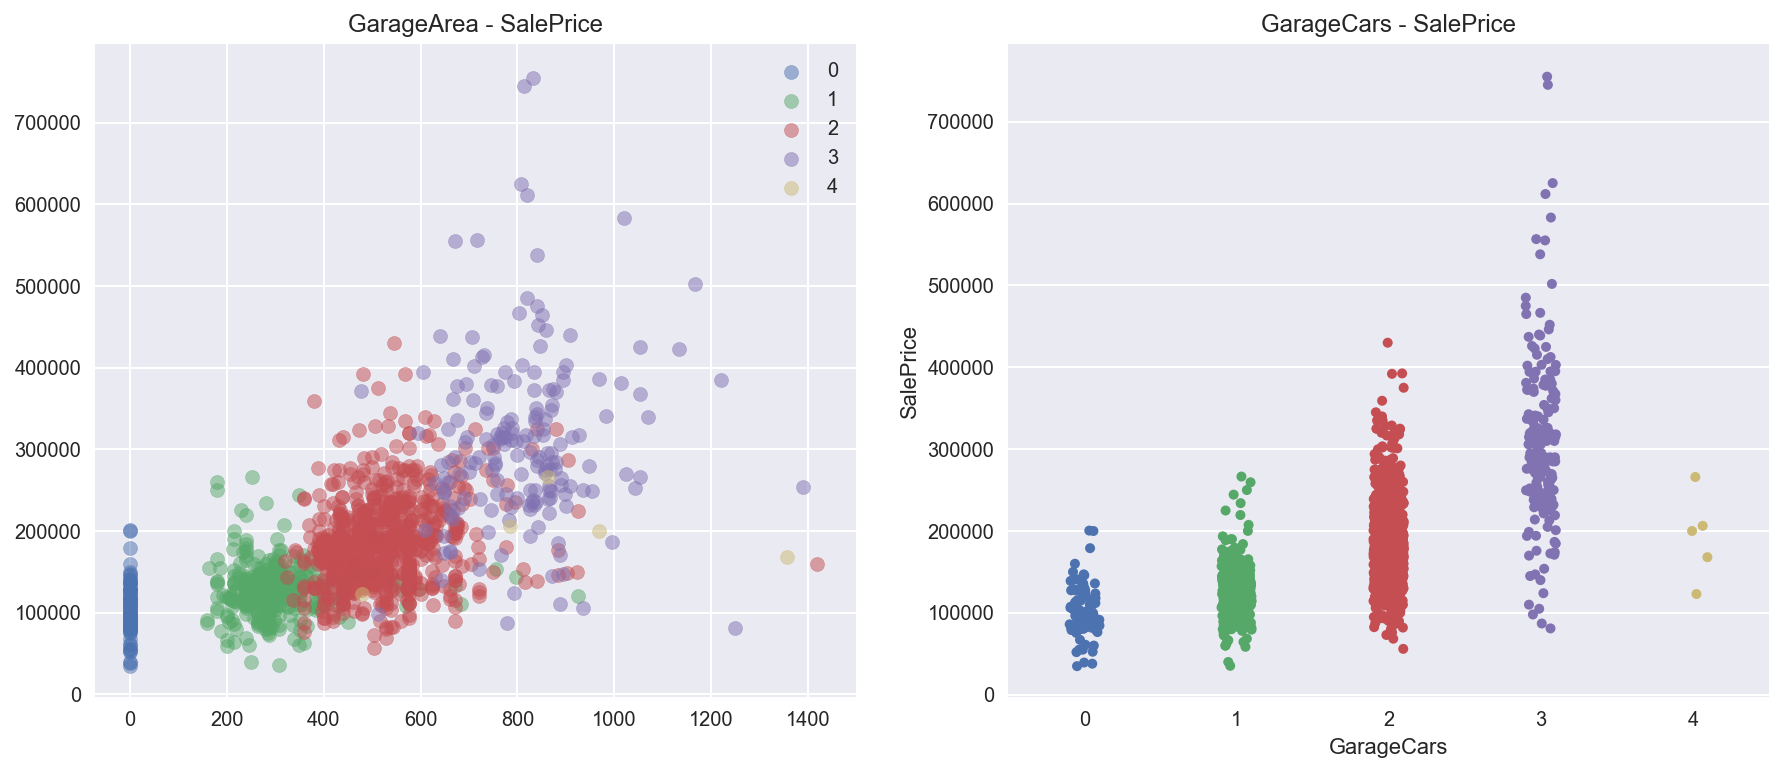

In [15]:
plt.figure(figsize=(15,6))

ax1 = plt.subplot(1,2,1)
for car in range(0,5):
    index = train.GarageCars == car
    ax1.scatter(x = train.GarageArea.loc[index], y = train.SalePrice.loc[index], data=train, label=car, alpha='0.5')

ax1.legend()
ax1.set_title('GarageArea - SalePrice')

ax2 = plt.subplot(1,2,2)
sns.stripplot(x = "GarageCars", y = "SalePrice", data=train,ax=ax2, jitter=True)
ax2.set_title('GarageCars - SalePrice')
ax2.legend()

plt.show()

#### Comments:
1. 집값이 높을수록 GarageArea가 넓어지고 창고에 넣을 수 있는 자동차 대수(GarageCars)도 많아지는것을 알 수 있음

#### 1-3-4 이웃

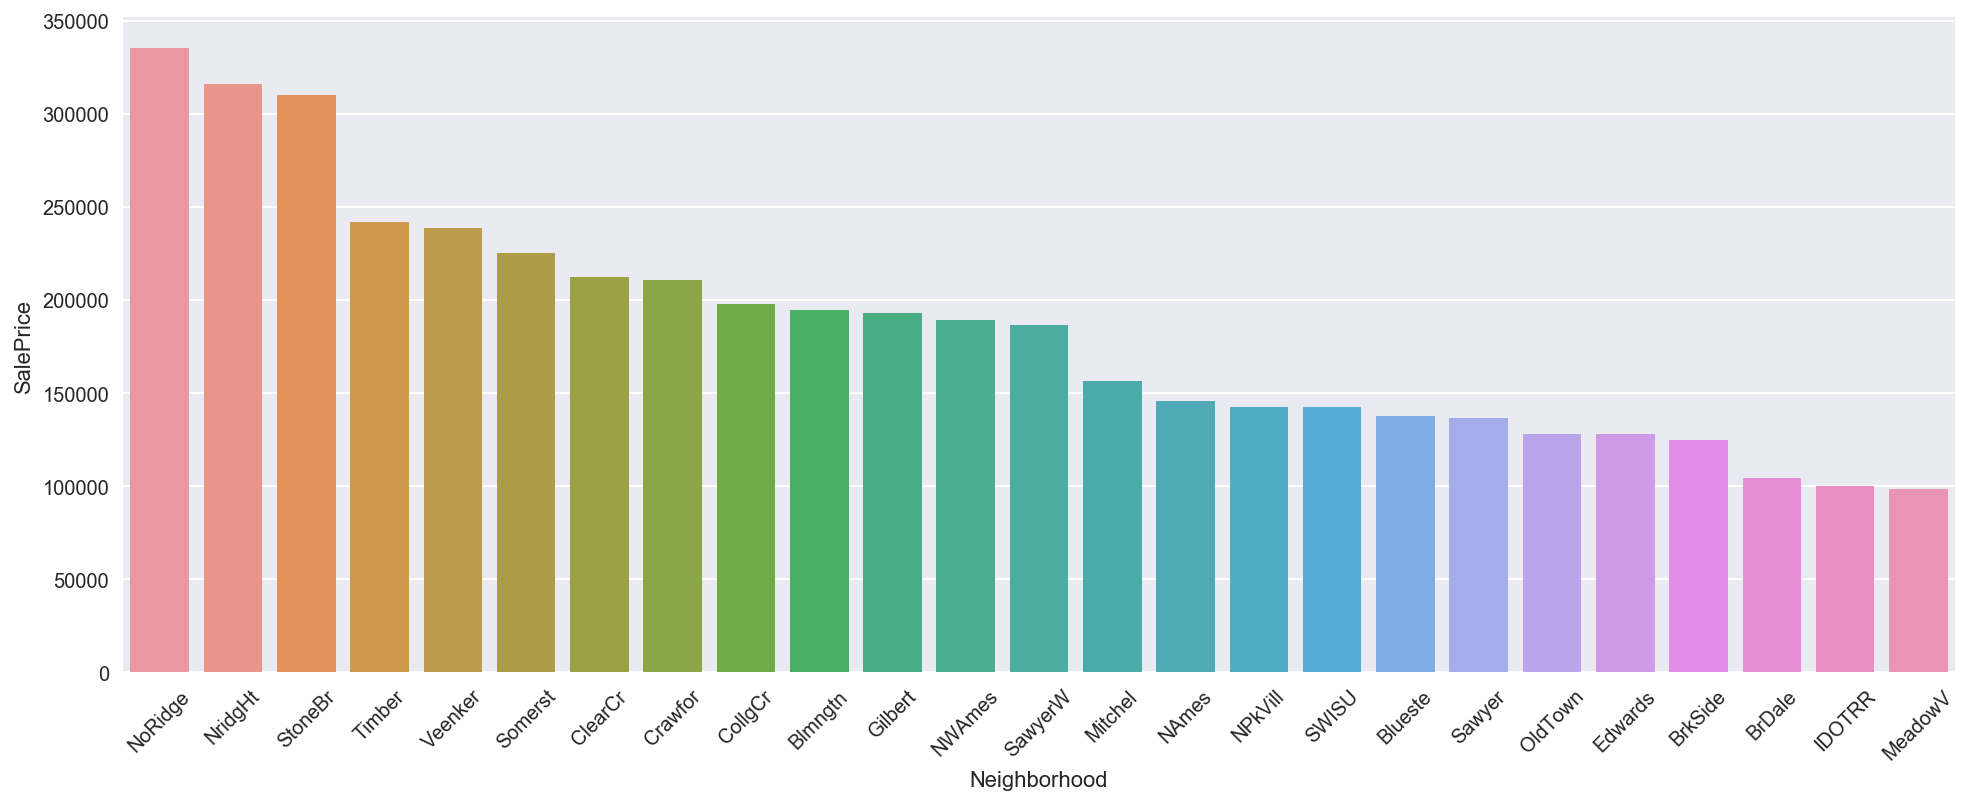

In [16]:
Neighbor = train.pivot_table(index="Neighborhood",values="SalePrice", aggfunc='mean').sort_values(by = ["SalePrice"], ascending = False)
Neighbor = Neighbor.reset_index()

g = sns.factorplot(x = "Neighborhood", y="SalePrice", data=Neighbor, size =8, kind="bar")
g.set_xticklabels(rotation=45)
g.fig.set_size_inches(15,5)
plt.show()

In [17]:
def neighbor_level(x):
    High_price_neighbor = ['NoRidge','NridgHt','StoneBr'] 
    Middle_price_neighbor = ['Timber','Somerst','Veenker','ClearCr','Crawfor','NWAmes', 'Gilbert','Blmngtn', 'SWISU','Mitchel','CollgCr']
    Low_price_neighbor = ['IDOTRR','Blueste', 'Sawyer','NAmes', 'BrDale', 'OldTown','MeadowV', 'NPkVill','BrkSide','Edwards']
    
    if str(x) in High_price_neighbor:
        return "high"
    elif str(x) in Middle_price_neighbor:
        return "middle"
    elif str(x) in Low_price_neighbor:
        return "low"
    
df_train["neighbor_level"] = df_train["Neighborhood"].apply(neighbor_level)

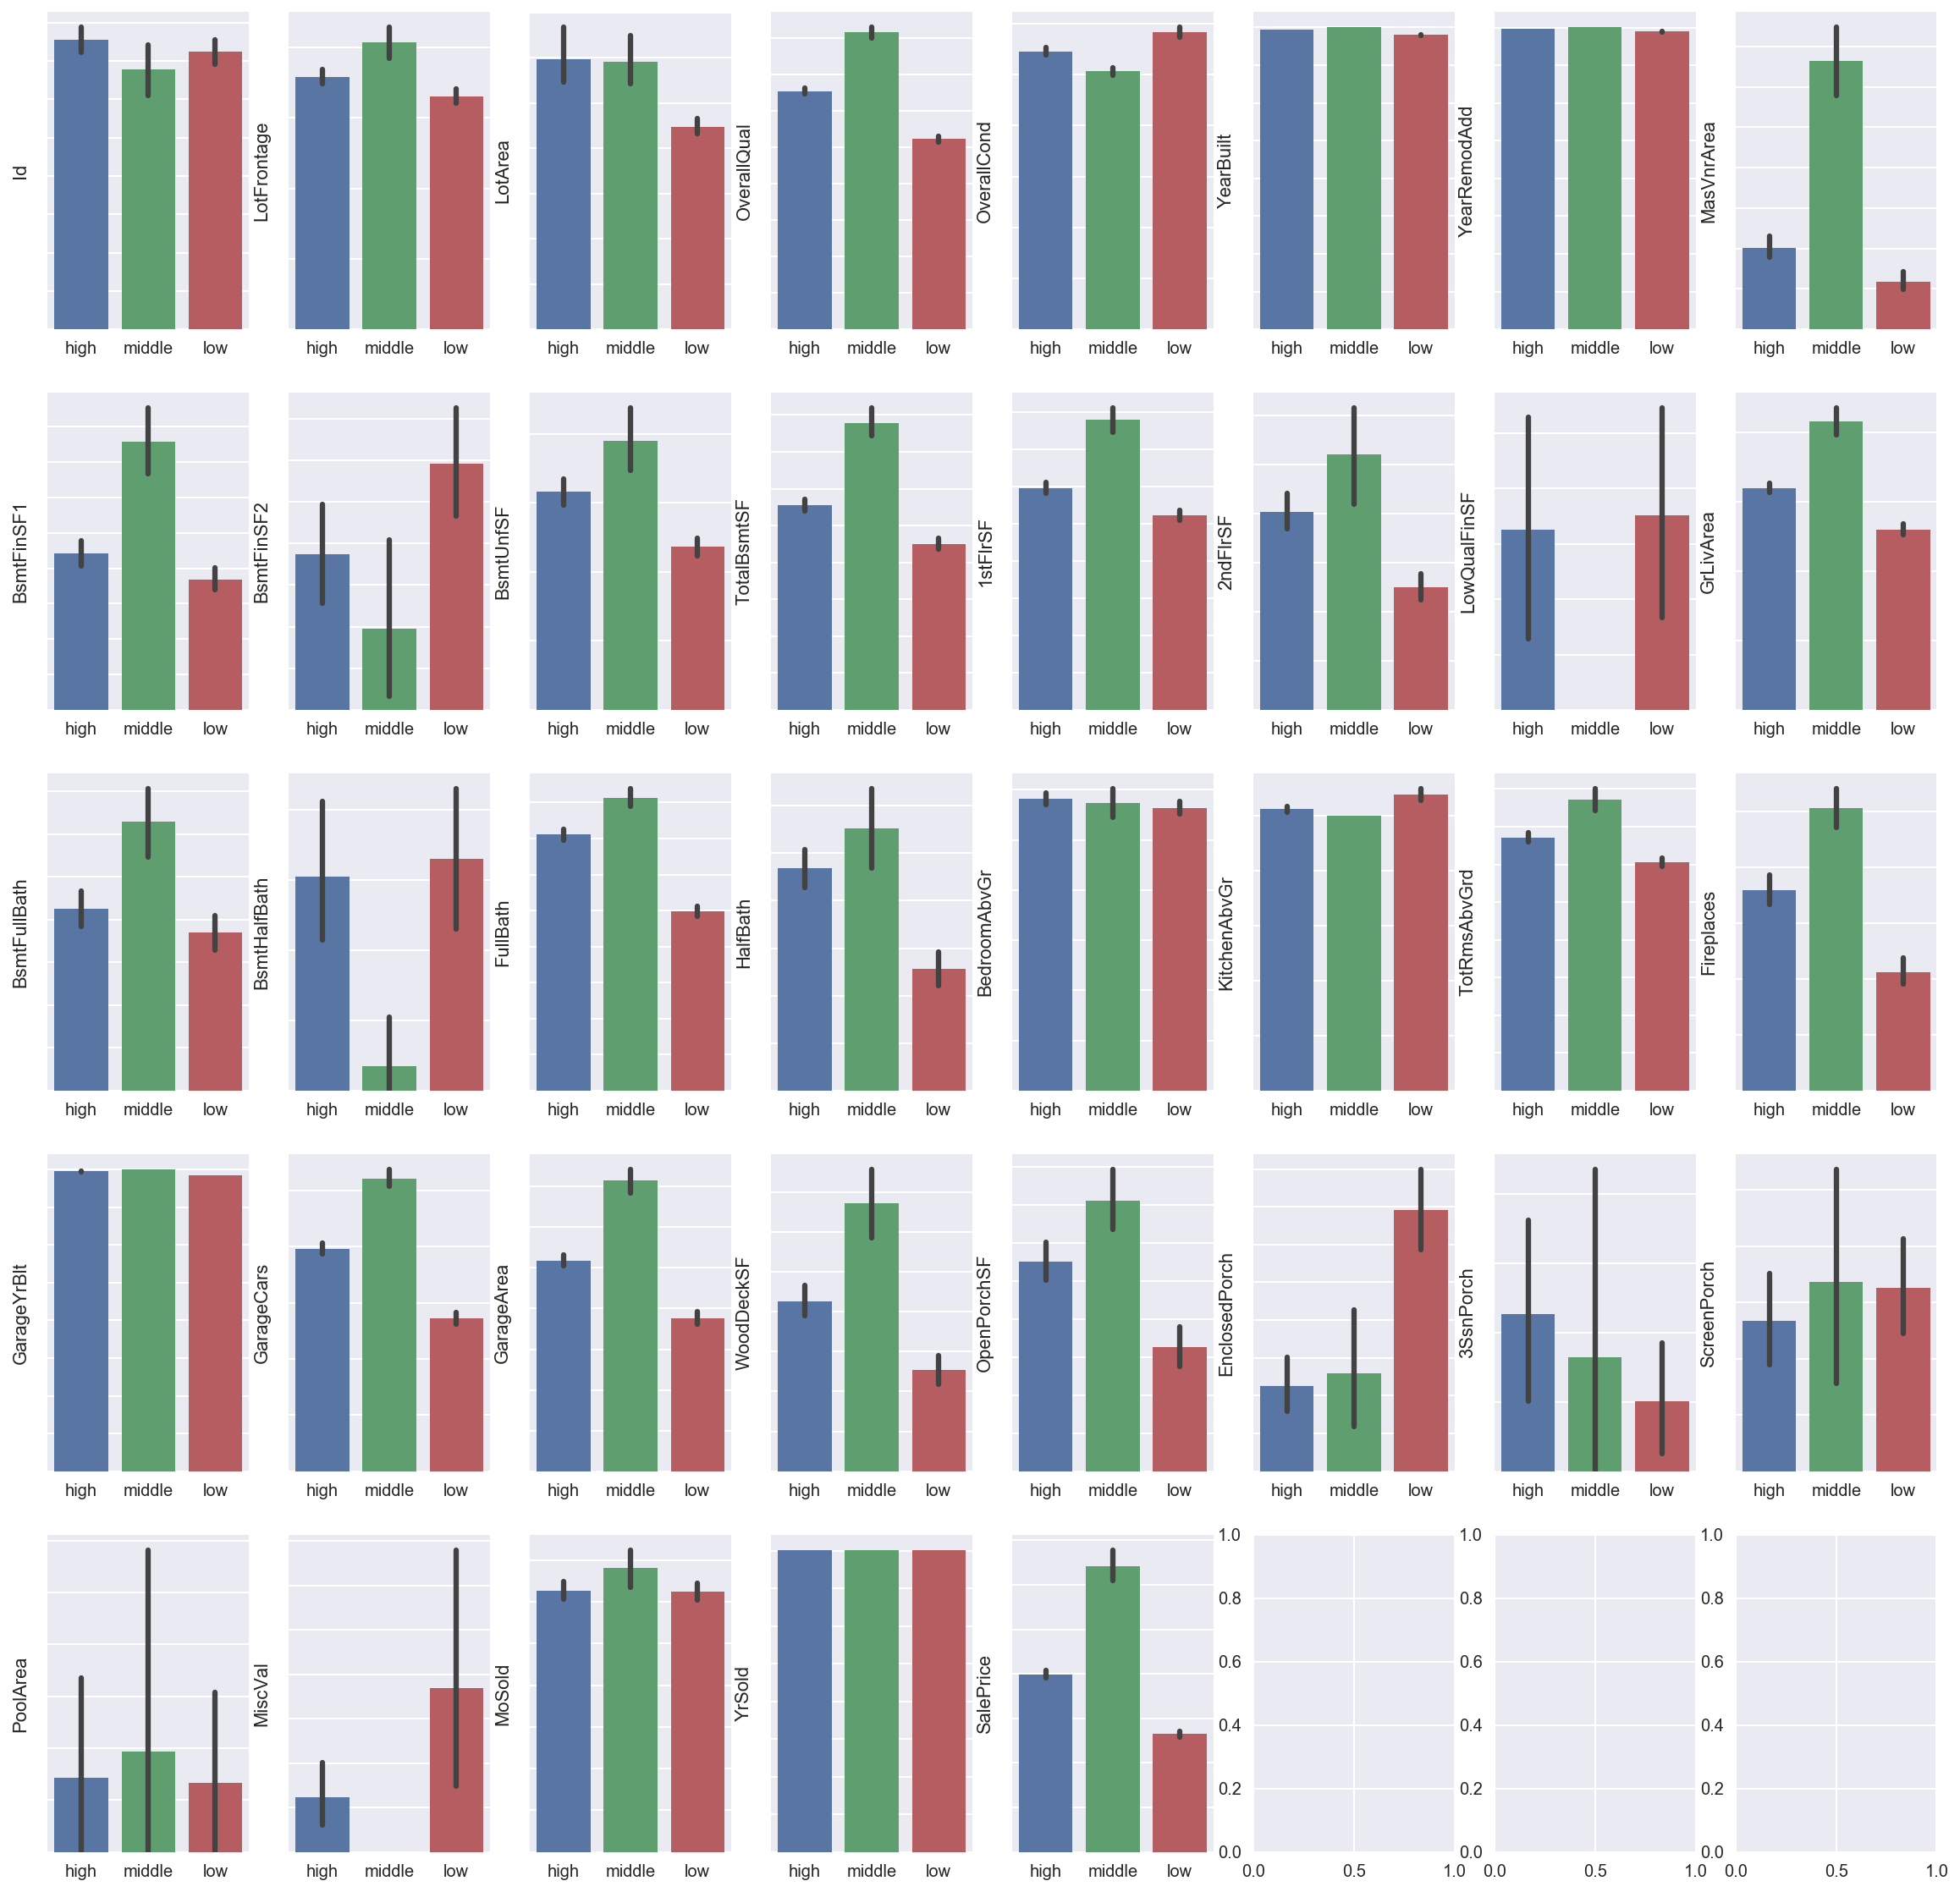

In [18]:
fig, ax = plt.subplots(5,8, figsize = (20,20))

for idx, n in enumerate(numerical_features):

    sns.barplot(x="neighbor_level", y= n, data=df_train, ax = ax[idx//8,idx%8])
    ax[idx//8, idx % 8].set(yticklabels=[])
    ax[idx//8, idx % 8].set(xticklabels=["high","middle","low"])
    ax[idx//8, idx % 8].set_xlabel("")
    ax[idx//8, idx % 8].set_ylabel(n)
    continue  

#### Comments:
1. 

#### 1-3-4 연도

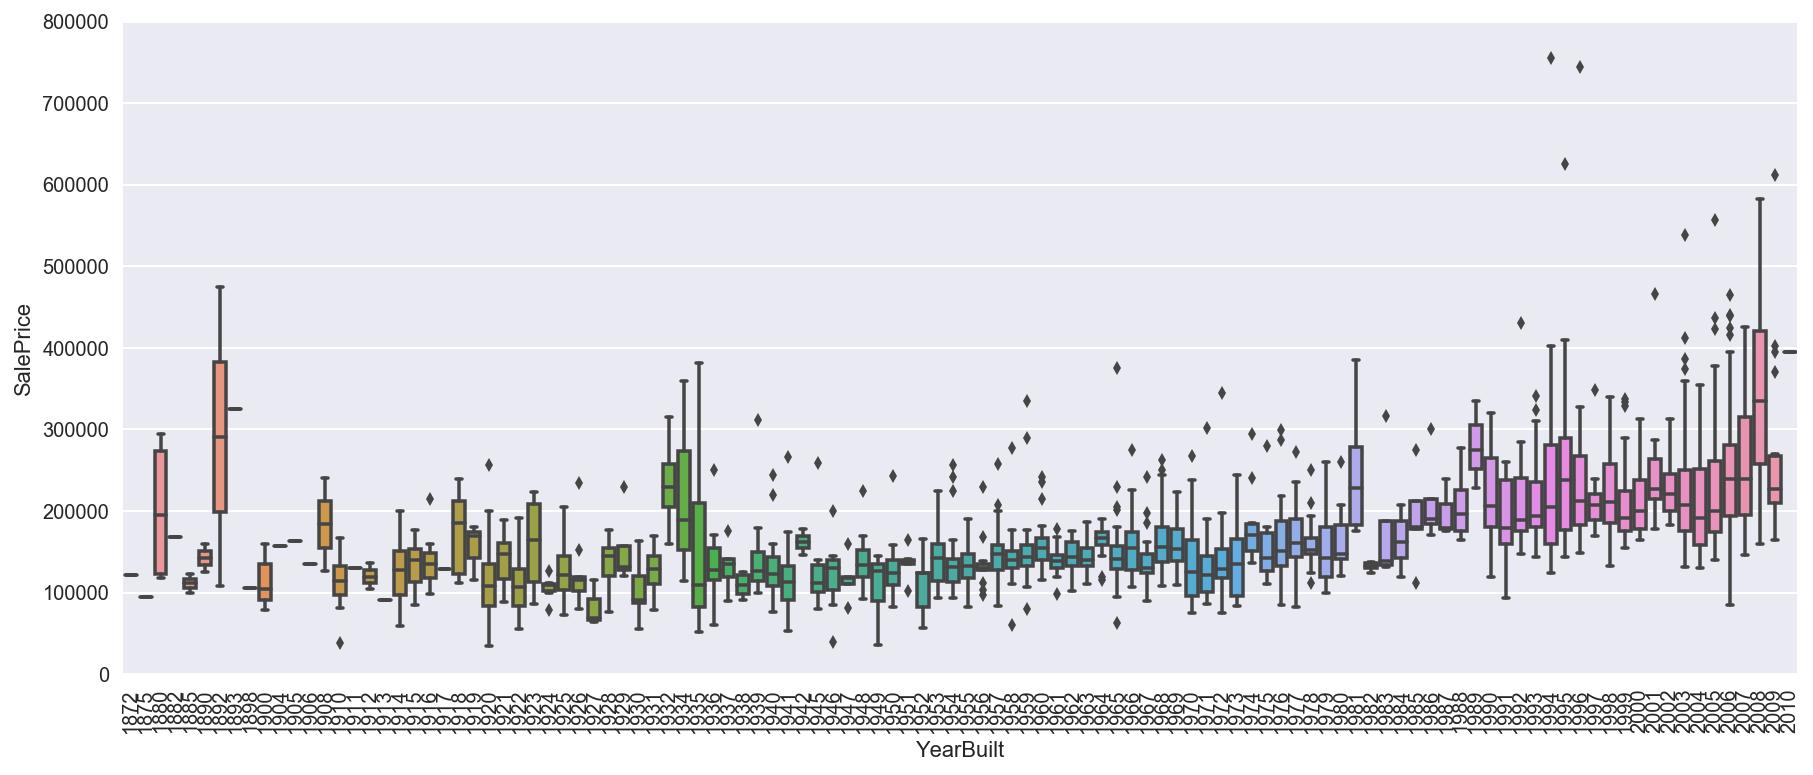

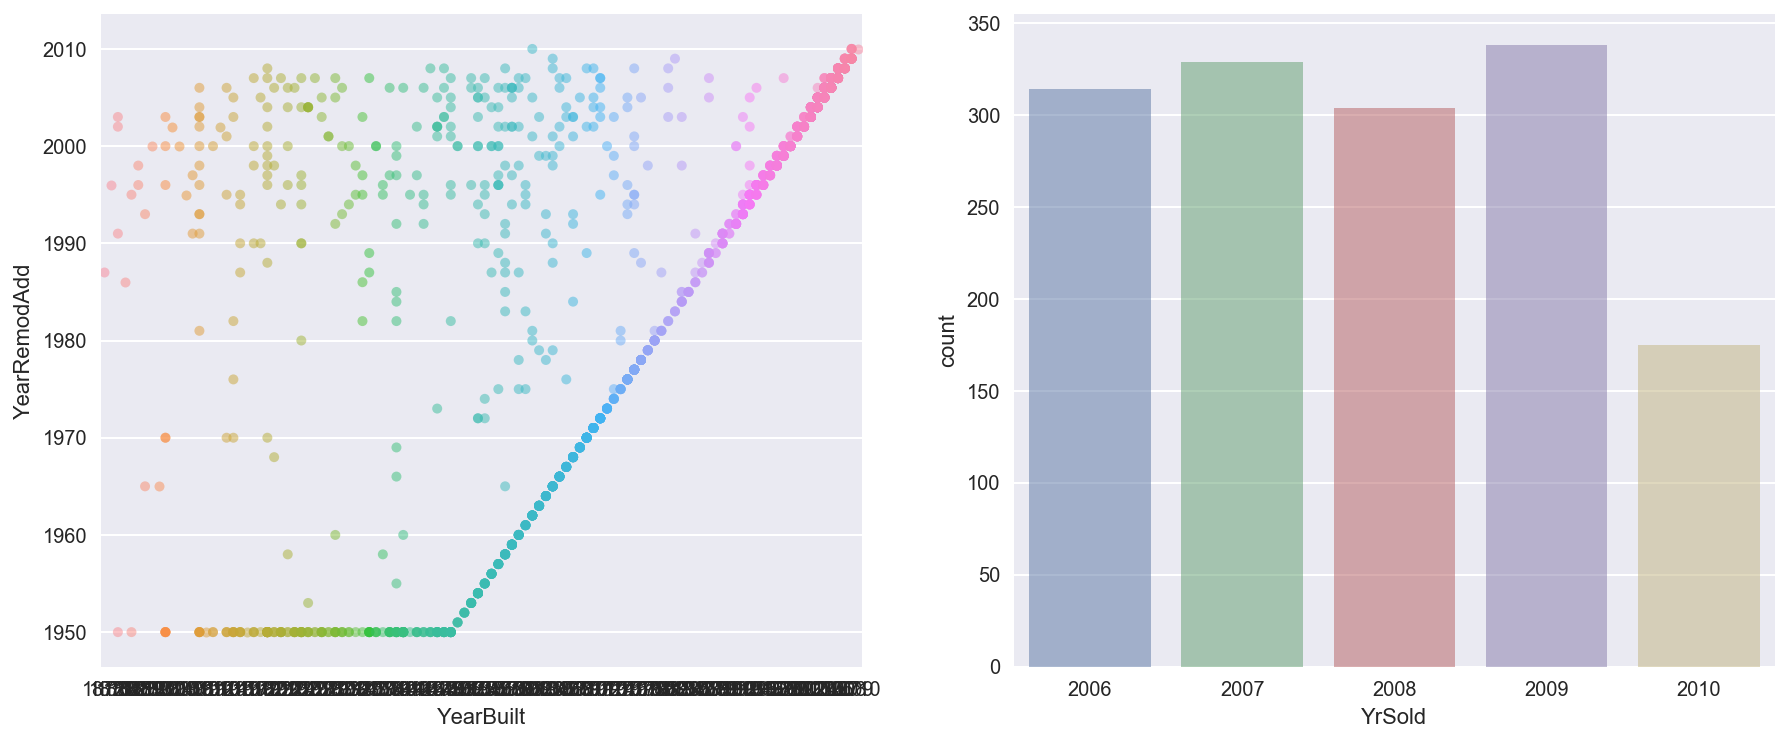

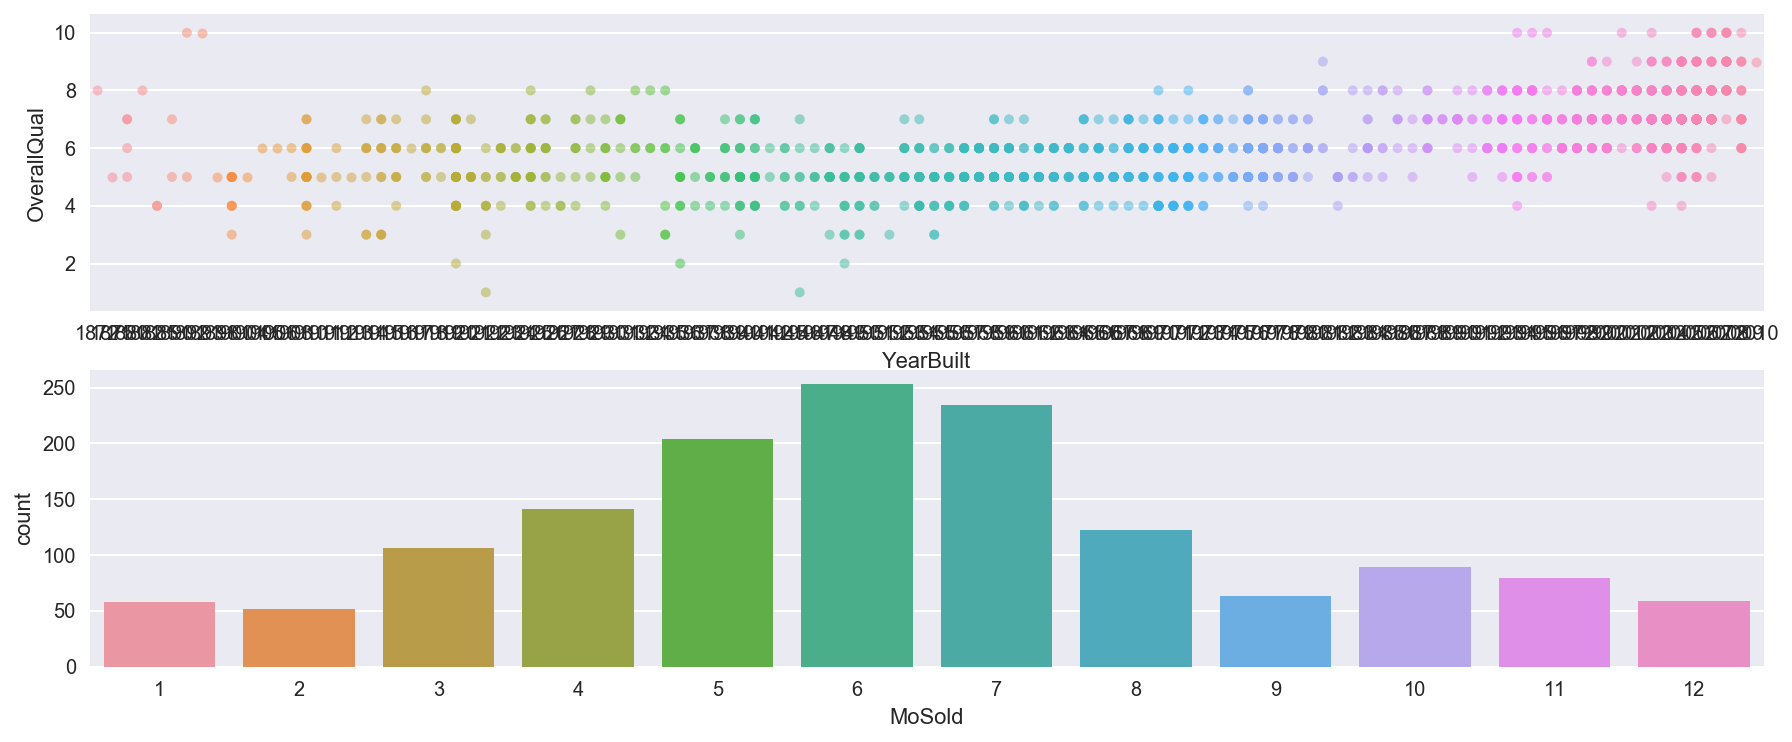

In [19]:
plt.figure(figsize=(15,6))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15,6))
ax2 = plt.subplot(1,2,1)
sns.stripplot(x = train['YearBuilt'], y = train['YearRemodAdd'], alpha = 0.5, ax=ax2)
ax2.legend()
plt.xlabel('YearBuilt')
plt.ylabel('YearRemodAdd')

ax3 = plt.subplot(1,2,2)
sns.countplot(x = train['YrSold'], alpha = 0.5, ax=ax3)
plt.show()

plt.figure(figsize=(15,6))
ax4 = plt.subplot2grid((2,2), (0,0), colspan = 2)
sns.stripplot(x = train['YearBuilt'], y = train['OverallQual'], alpha = 0.5, ax=ax4)
ax4.legend()
plt.xlabel('YearBuilt')
plt.ylabel('OverallQual')

ax5 = plt.subplot2grid((2,2), (1,0), colspan = 2)
sns.countplot(x = "MoSold", data=train, ax = ax5)
plt.show()

#### Comments :

1. 1950년대 이후로 지어진 집부터는 대체로 최근에 지어진 집의 가격이 높음을 알 수 있음.
2. 아직 리모델링이 되지 않은 집은 만들어진 년도와 같은 년도로 기록되어 있음.
3. 리모델링은 1950년도 이후에 시행되었으며 오래된 집들은 대부분 1950년도에 리모델링 되었다고 기록되어 있음.
4. 매매년도는 2006년부터 2010년까지의 기록으로 되어있으며, 2009년에 매매가 가장 많음.
5. OverallQual이 8-10인 집은 대체로 1980년도 이후에 지어진 집임.
6. 날이 따뜻한 5, 6, 7월에 가장 매매가 활발하게 이루어짐.

### 1-3-5 화로의 갯수와 품질

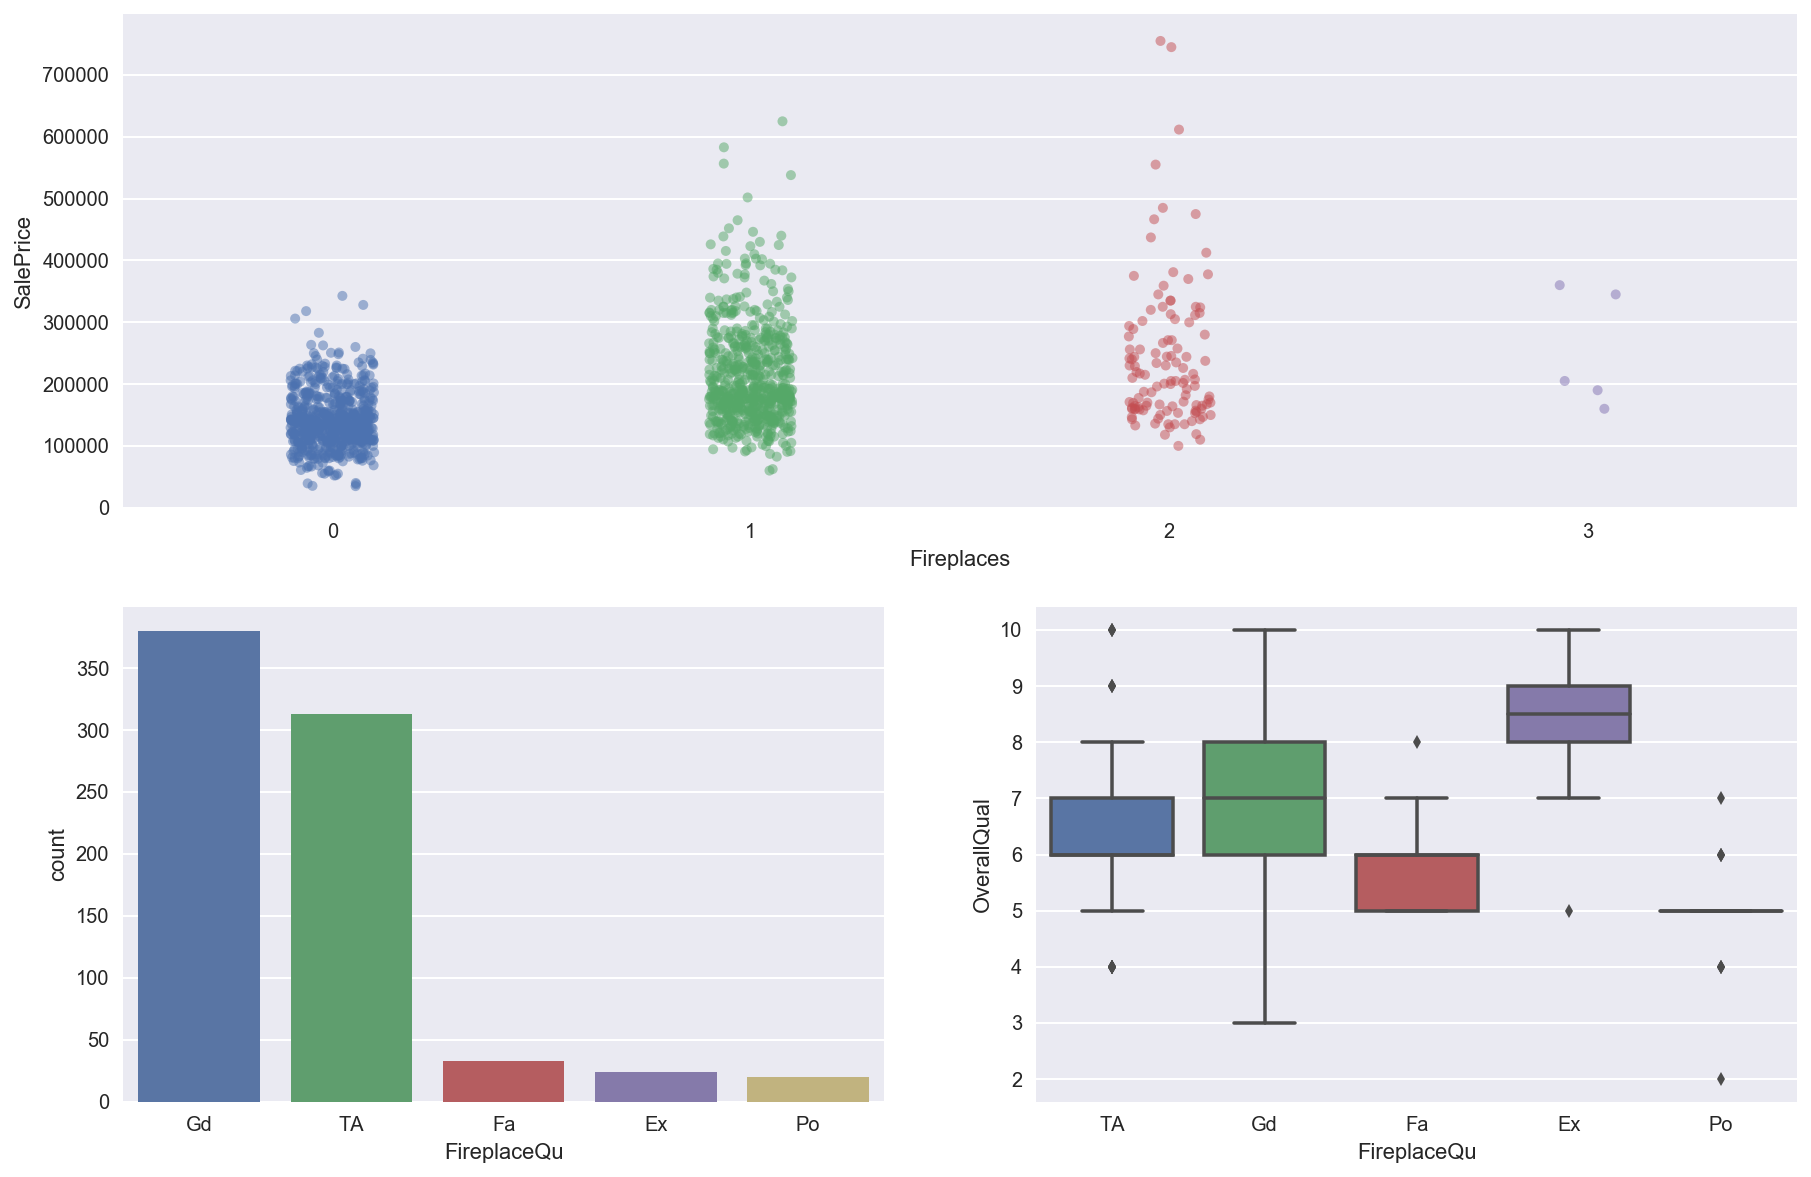

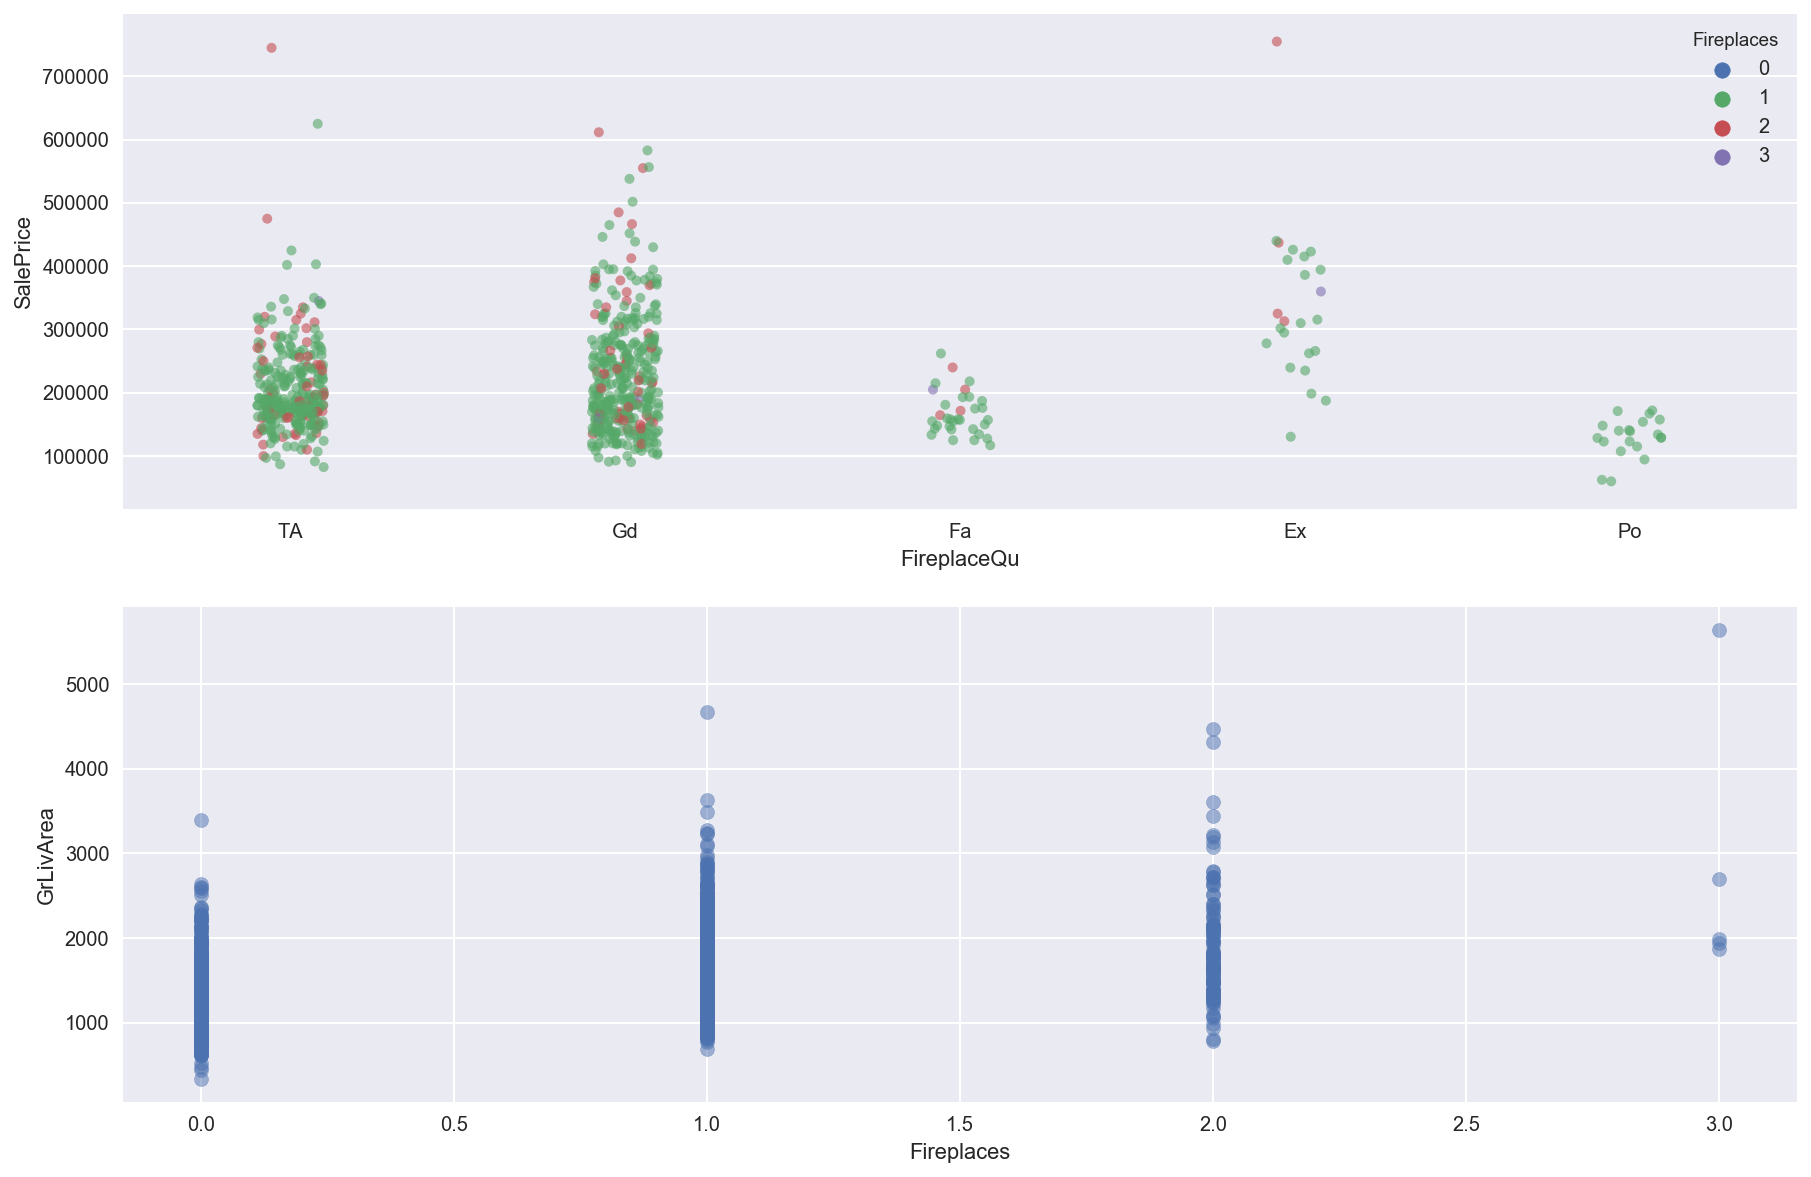

In [20]:
plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
sns.stripplot(x = train['Fireplaces'], y = train['SalePrice'], alpha = 0.5, jitter = True, ax=ax1)

ax2 = plt.subplot2grid((2,2), (1,0))
sns.countplot(x = "FireplaceQu", data=train, ax = ax2, order = train["FireplaceQu"].value_counts().index)

ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = 'FireplaceQu', y = 'OverallQual', data = train, ax=ax3)
plt.show()

plt.figure(figsize=(15,10))
ax4 = plt.subplot(2,1,1)
sns.stripplot(x='FireplaceQu', y='SalePrice', hue='Fireplaces', data=train, jitter=True, alpha=0.6, ax=ax4)

ax5 = plt.subplot(2,1,2)
ax5.scatter(x = train['Fireplaces'], y = train['GrLivArea'], alpha = 0.5)
plt.xlabel('Fireplaces')
plt.ylabel('GrLivArea')
plt.show()

#### Comments:

1. FirePlaces가 0개인 집과 1개인 집의 가격 차이가 있음을 볼 수 있음.
2. FireplaceQu와 OverallQual은 밀접한 관계가 있음.
3. FireplaceQu는 SalePrice에 많은 영향을 미친다고 볼 수는 없음.
4. 같은 GrLivArea임에도 Fireplaces의 갯수는 차이가 있음.

### 1-3-6 지하 욕실

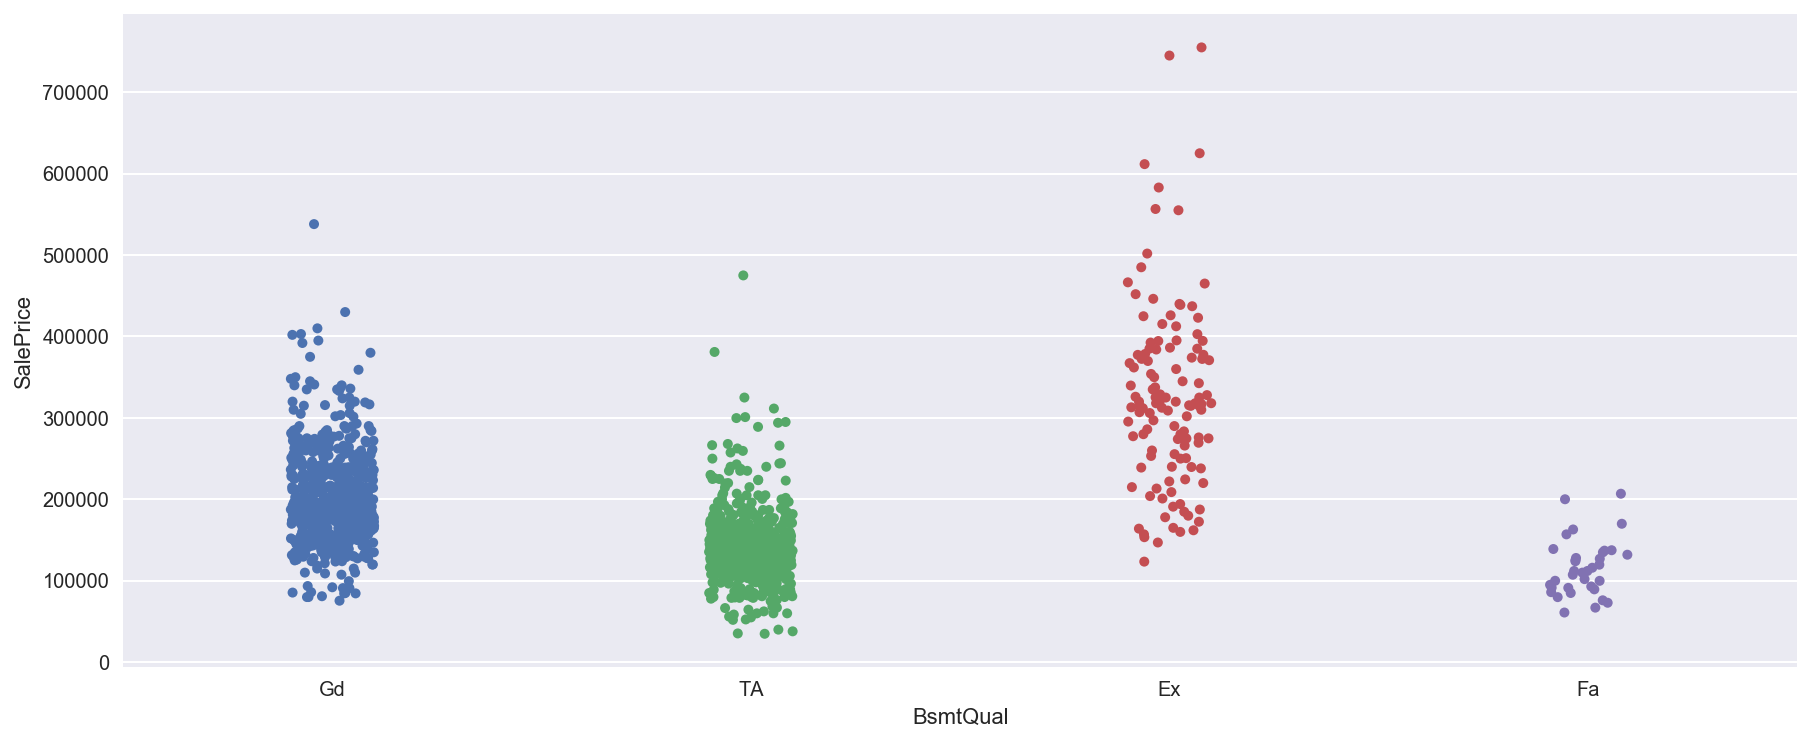

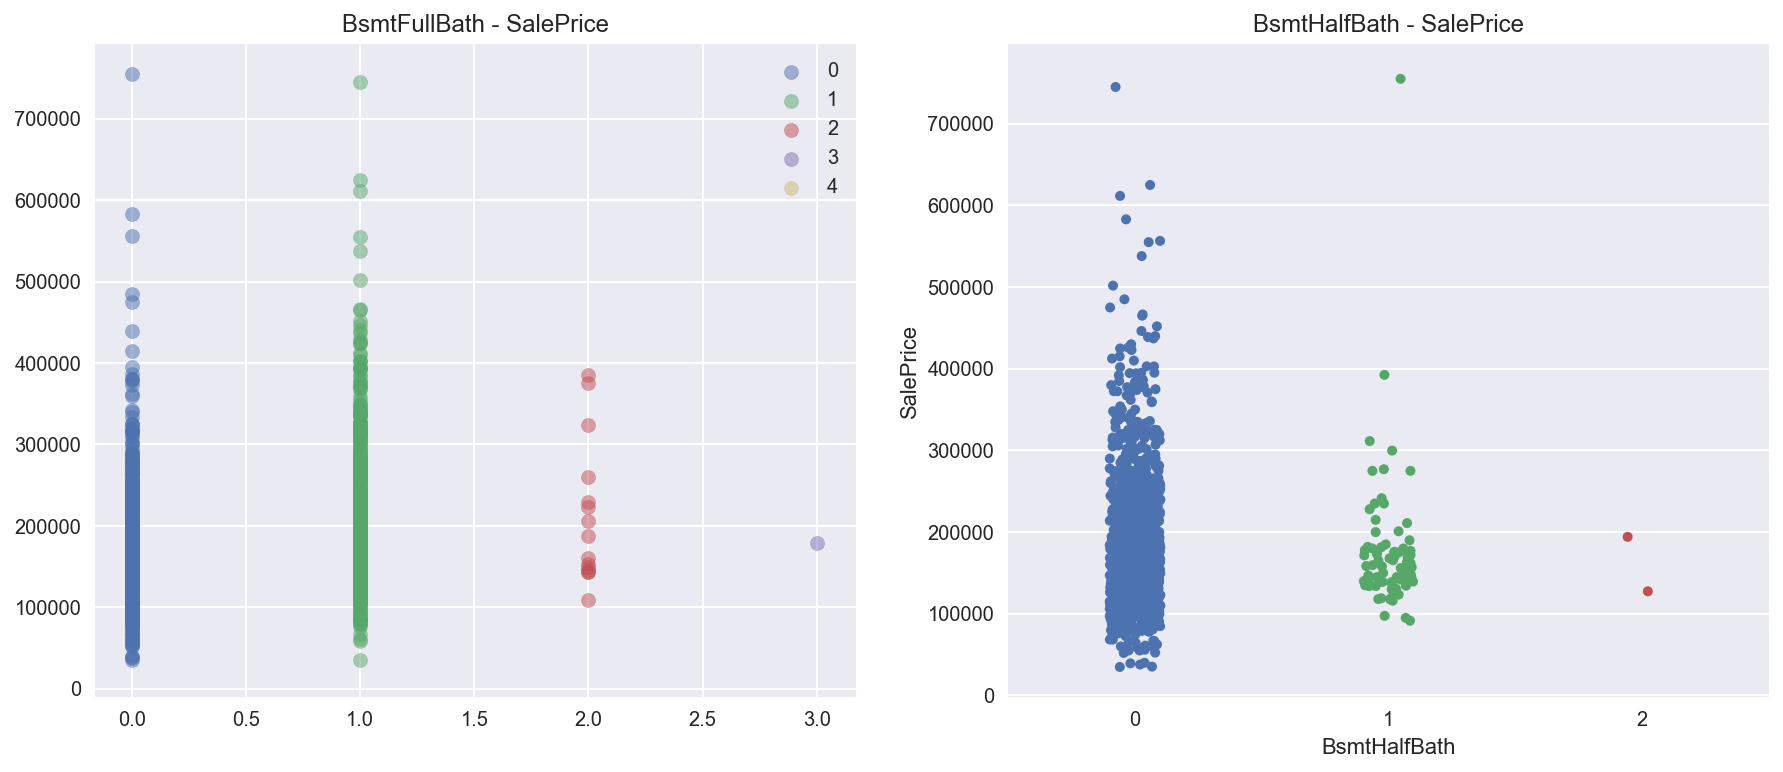

In [21]:
plt.figure(figsize=(15,6))
sns.stripplot(x = "BsmtQual", y = "SalePrice", data=train, jitter=True)
plt.show()

plt.figure(figsize=(15,6))

ax1 = plt.subplot(1,2,1)
for BSMT in range(0,5):
    index = train.BsmtFullBath == BSMT
    ax1.scatter(x = train.BsmtFullBath.loc[index], y = train.SalePrice.loc[index], data=train, label=BSMT, alpha='0.5')

ax1.legend()
ax1.set_title('BsmtFullBath - SalePrice')

ax2 = plt.subplot(1,2,2)
sns.stripplot(x = "BsmtHalfBath", y = "SalePrice", data=train,ax=ax2, jitter=True)
ax2.set_title('BsmtHalfBath - SalePrice')
ax2.legend()

#### Comment :
1. 욕실의 품질이 좋을 수록 집값이 높아지는 것을 알 수 있음
2. HalfBath의 경우에는 많을수록 집값은 더 내려가는 것을 확인할 수 있음.

### 1-3-7 방의 크기

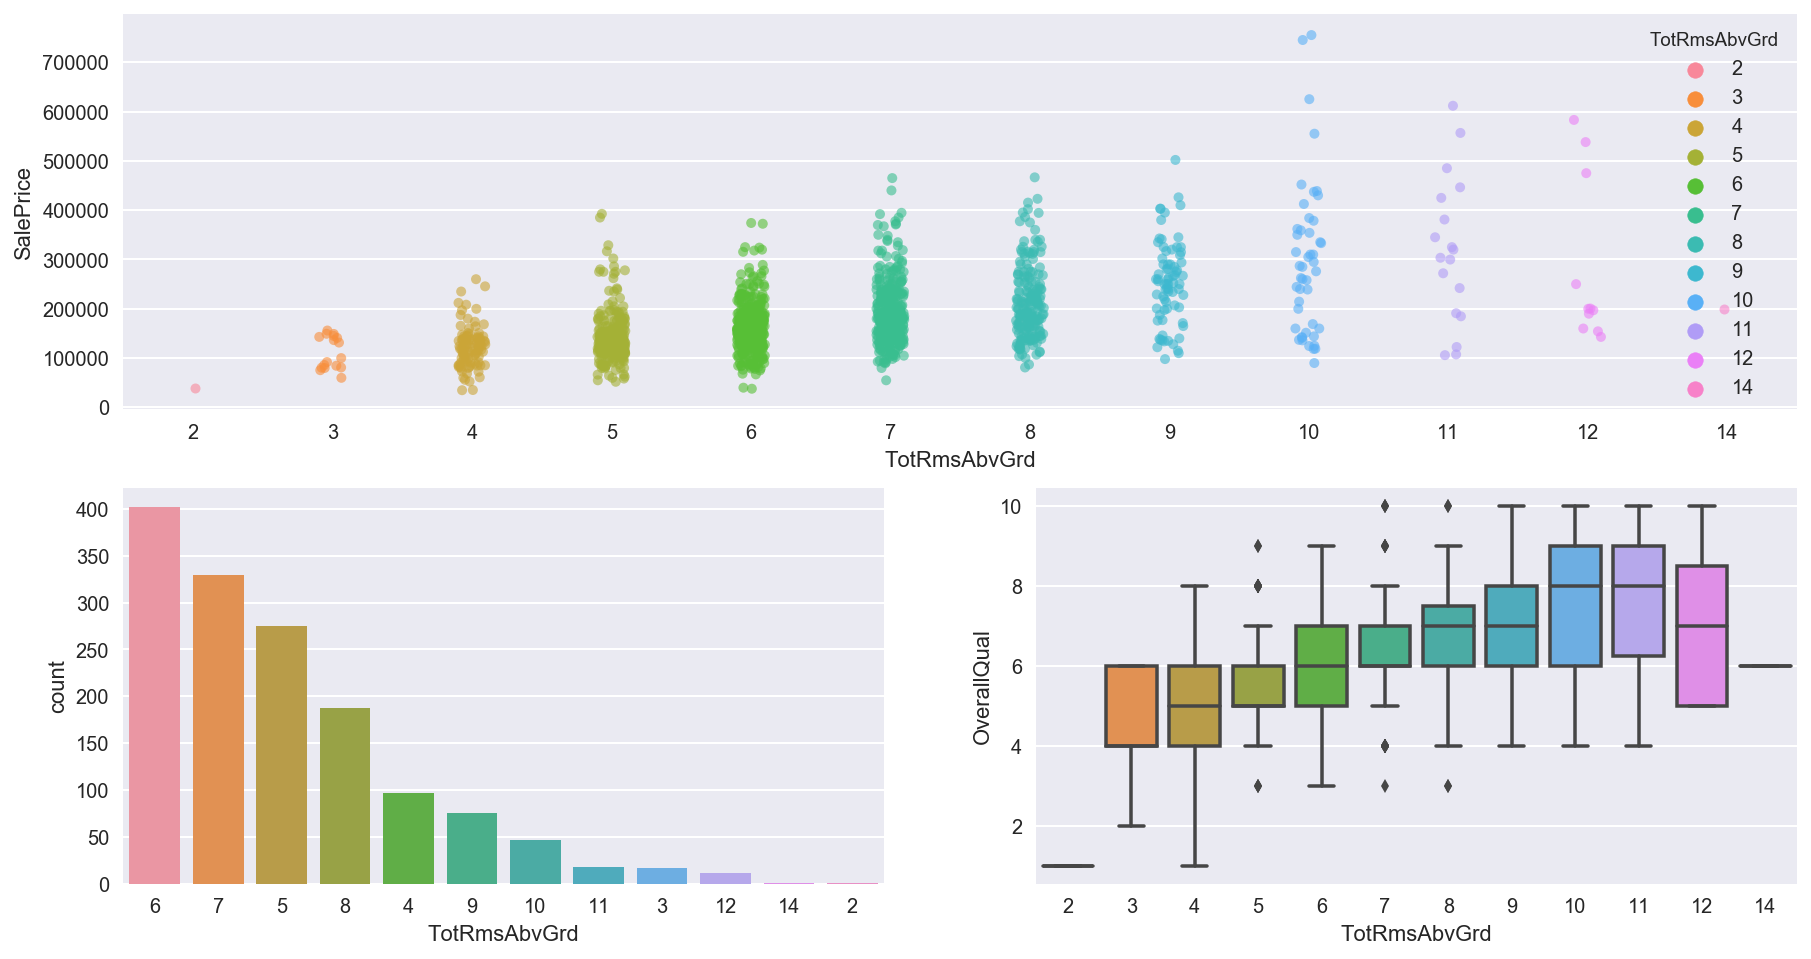

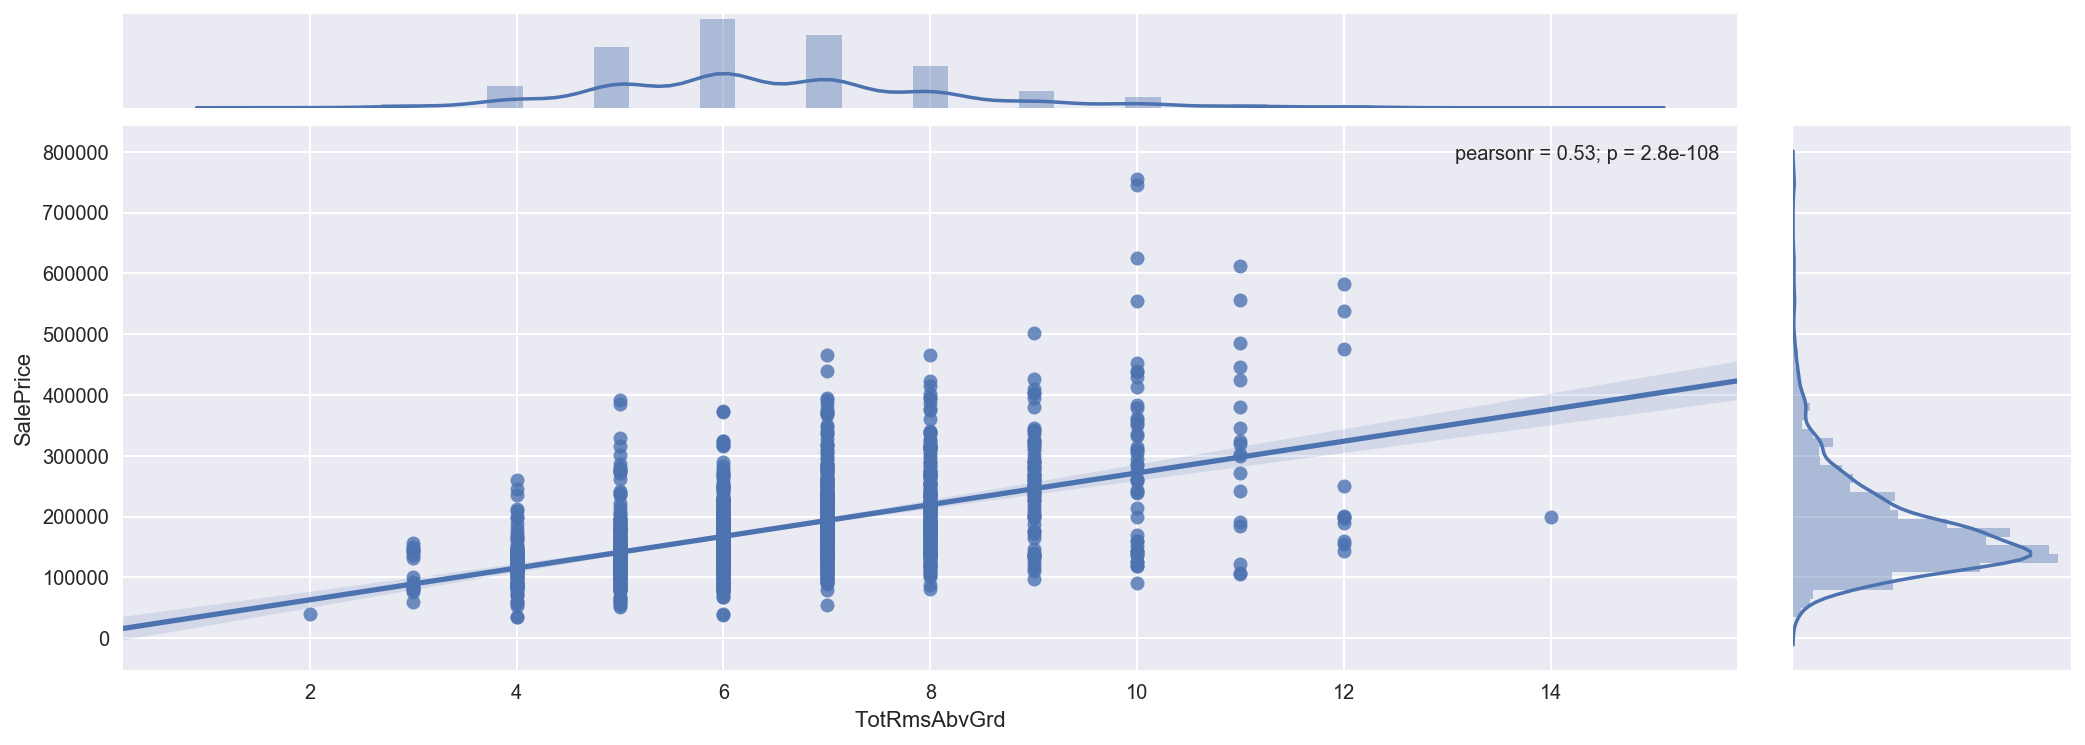

In [22]:
plt.figure(figsize=(15,8))
ax1 = plt.subplot(2,1,1)
sns.stripplot(x='TotRmsAbvGrd', y='SalePrice', hue='TotRmsAbvGrd', data=train, jitter=True, alpha=0.6, ax=ax1)

ax2 = plt.subplot2grid((2,2), (1,0))
sns.countplot(x = "TotRmsAbvGrd", data=train , ax = ax2, order = train["TotRmsAbvGrd"].value_counts().index)

ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = 'TotRmsAbvGrd', y = 'OverallQual', data = train, ax=ax3)
plt.show()


grid = sns.jointplot(x = "TotRmsAbvGrd", y = "SalePrice", data=train, kind="reg", size = 8)
grid.fig.set_size_inches(15,5)

#### Comment :

1. 방의 등급 (TotRmsAbvGrd)이 좋을 수록 집값은 높은 경향이 있음
2. 방의 등급이 좋을수록 집의 품질도 좋아진다는 상관관계를 확인할 수 있음


### 2. Feature Engineering

### 2-1 Missing Data 처리

#### 2-1-1 Train 데이터와 Test 데이터 결합
Train과 Test데이터를 결합한 후 missing 데이터를 한꺼번에 처리

In [5]:
ntrain = train.shape[0]
ntest = test.shape[0]
all_data = pd.concat((train, test)).reset_index(drop=True)
print("All data size is {}".format(all_data.shape))

All data size is (2919, 81)


#### 2-1-2 Missing Data 현황

Missing Data가 포함된 변수의 갯수 :  [34]
총 Missing Data 갯수 :  [13965]


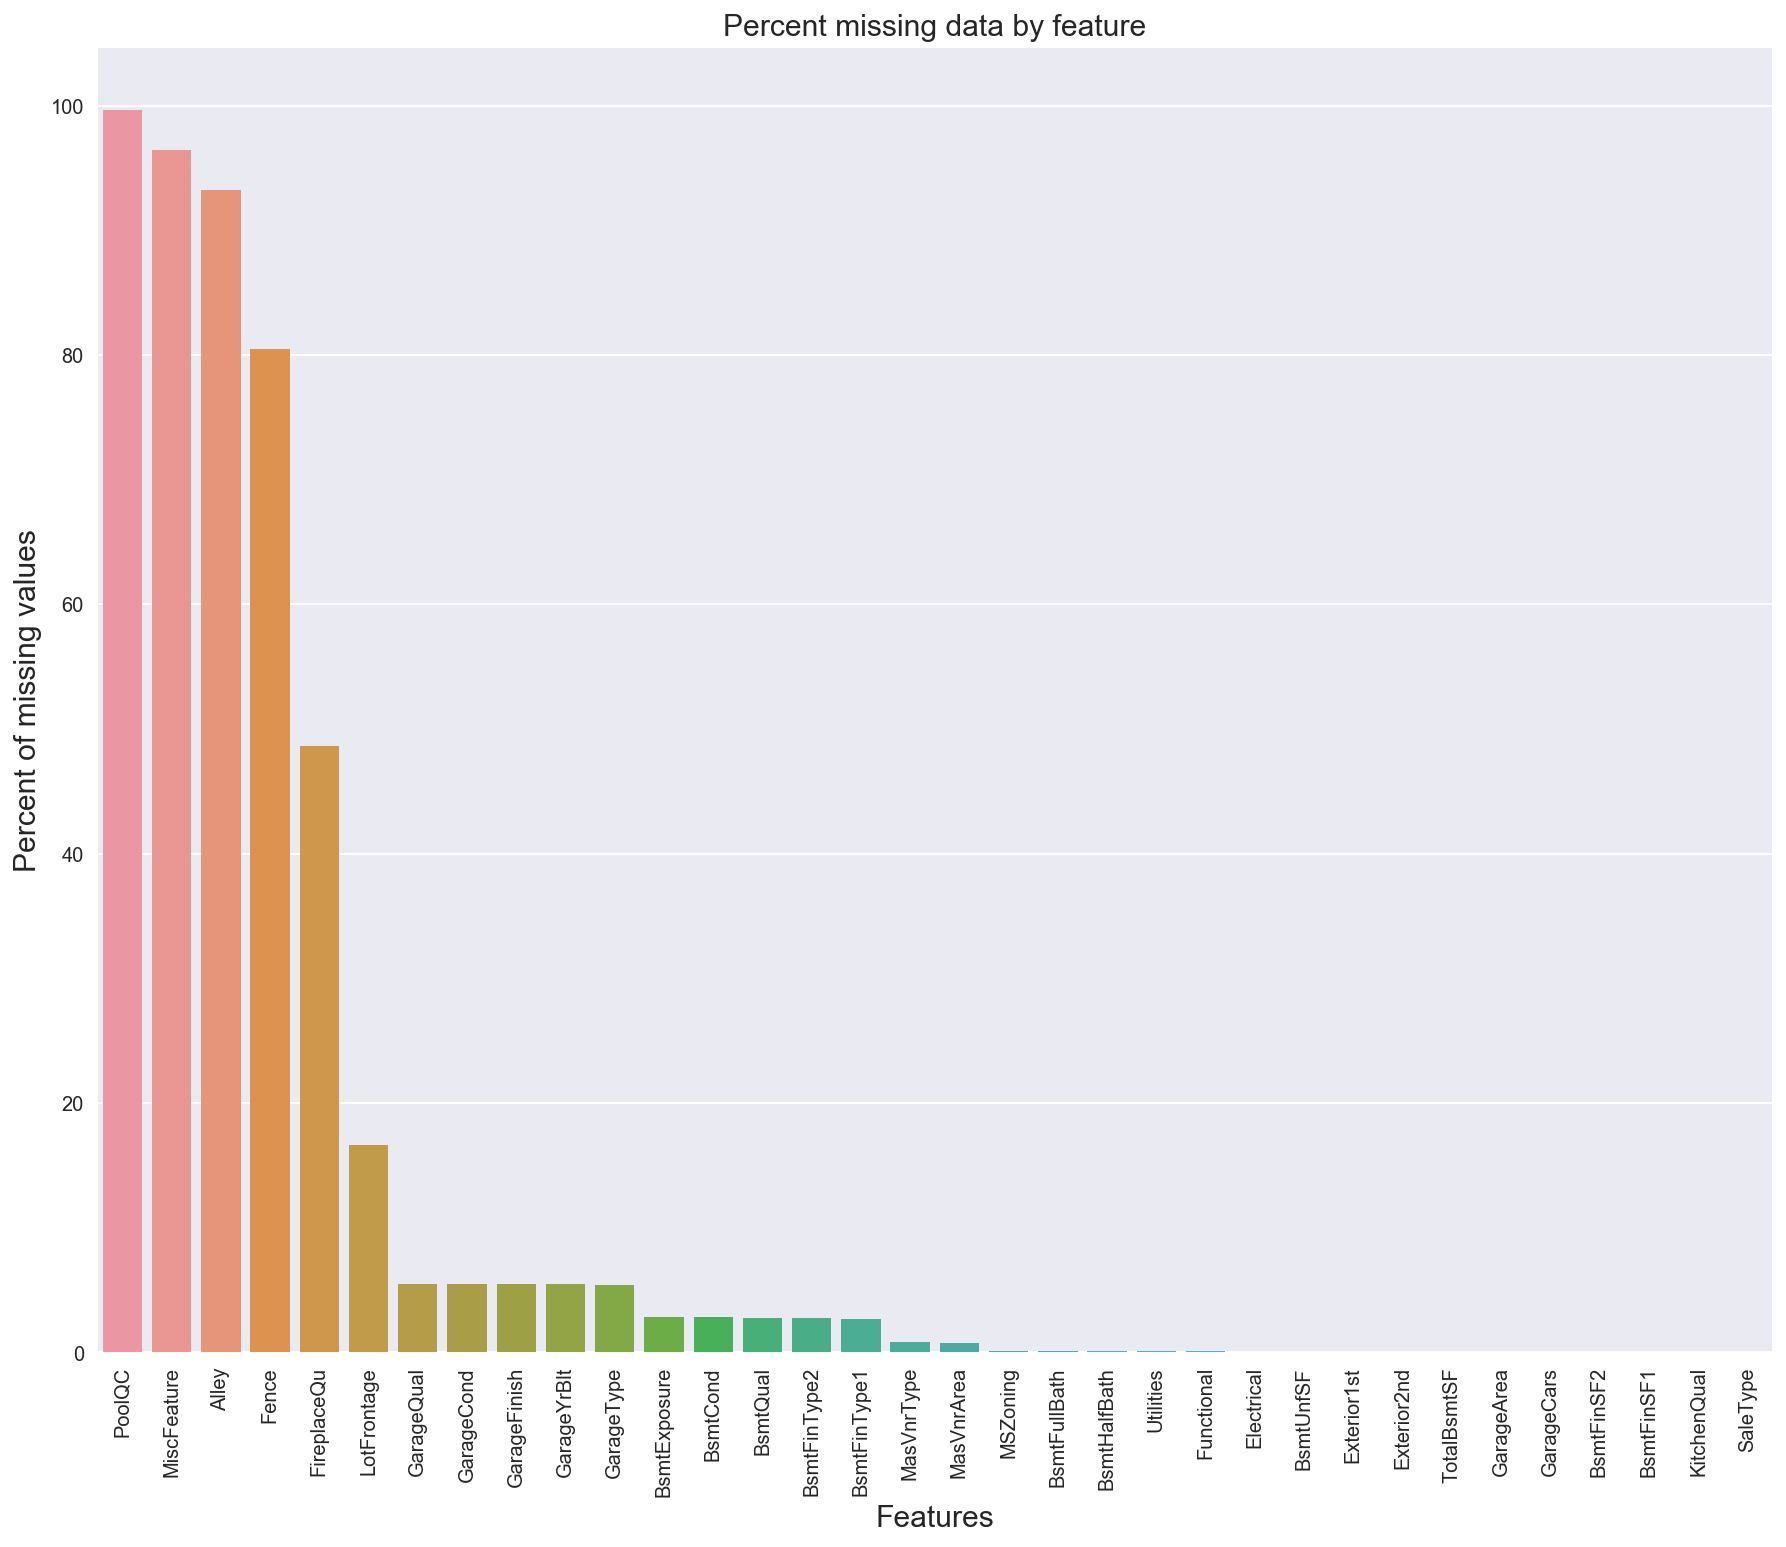

In [24]:
all_data_cp = all_data.copy()
all_data_cp.drop(['SalePrice'], axis=1, inplace=True)
all_data_null = all_data_cp.isnull().sum()
all_data_null = all_data_null.drop(all_data_null[all_data_null == 0].index).sort_values(ascending=False)
all_data_missing = pd.DataFrame({'Missing Numbers' :all_data_null})

all_data_null =  all_data_null / len(all_data_cp)*100
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_null.index, y=all_data_null)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

print("Missing Data가 포함된 변수의 갯수 : " , all_data_missing.count().values)
print("총 Missing Data 갯수 : " , all_data_missing.sum().values)

#### 2-1-3 Missing Data 처리방식

# 수정

MSSubClass

 - 변수 설명 : 집안 판매와 관련된 종합적인 유형 식별 
 - 변수 처리 : 데이터가 고르게 분포되어있고 특정 데이터로 판단하기 어렵기에 None값으로 채워줍니다.

In [20]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

SaleType
 - 변수 설명 : 집계약의 판매 방식을 기입   
 - 처리 방법 : 전체 데이터 중 87%가 WD (Warranty Deed - Conventional) 방식을 사용하고 있으므로 Missing Data을 WD로 채워넣었음 

In [25]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

KitchenQual:
 - 변수 설명 : 부억의 품질
 - 처리 방법 : 전체 데이터 중 52%가 TA (Typical/Average)의 등급이 되어있으므로 Missing Data을  TA로 채워넣었음

In [26]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

BsmtFinSF1 & BsmtFinSF2

 - 변수 설명 : 지하실의 마감 품질 
 - 처리 방법 : 두 데이터 모두 약35%의 데이터가 0으로 되어있으므로 Missing Data을 0으로 채워넣었음

In [27]:
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(0)
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(0)

# 수정 

GarageCars  &  GarageArea & GarageYrBlt

 - 변수 설명 : 차고의 자동차 수 & 차고 크기 & 건축연한
 - 처리 방법 : 데이터가 missing이라는것은 차가 없다는 것을 의미하기에 Missing Data를 0으로 채워넣음

In [28]:
all_data['GarageCars'] = all_data['GarageCars'].fillna(0)
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)

TotalBsmtSF

 - 변수 설명 : 지하실 면적의 총 평방 피트 (크기)
 - 처리 방법 : 데이터가 missing이라는것은 지하실이 없다는 것을 의미하기에 Missing Data를 0으로 채워넣음

In [29]:
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(0)

BsmtUnfSF

 - 변수 설명 : 지하 공간의 미완성 된 공간의 크기
 - 처리 방법 : 데이터가 missing이라는것은 지하실이 없다는 것을 의미하기에 Missing Data를 0으로 채워넣음

In [30]:
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(0)

BsmtQual & BsmtCond

 - 변수 설명 : 지하실 높이에 따른 품질 & Condition
 - 처리 방법 : BsmtQual 데이터에서의 Nan값은 지하실이없어 품질 측정 BsmtCond같은 경우에도 비슷한 성격의 변수이기에 Nan값은 None으로 변환해줌

In [31]:
all_data['BsmtQual']=all_data['BsmtQual'].fillna('None')
all_data['BsmtCond']=all_data['BsmtCond'].fillna('None')

# 수정 

BsmtExposure & BsmtFinType1 & BsmtFinType2

 - 변수 설명 : 지하실의 품질관련 변수 
 - 처리 방법 : 여기에서 Nan값은 지하실이 없는 집을 표기한것으로 None 값으로 변환해줍니다.

# 수정 

In [32]:
all_data['BsmtExposure']=all_data['BsmtExposure'].fillna('None')
all_data['BsmtFinType1']=all_data['BsmtFinType1'].fillna('None')
all_data['BsmtFinType2']=all_data['BsmtFinType2'].fillna('None')

BsmtFullBath & BsmtHalfBath

 - 변수 설명 : 화장실 욕조 or 샤워시설 유무에 따라 Full&Half로 나눔 
 - 처리 방법 : Missing data는 욕실이 없음을 의미하다고 판단 Missing data를 0으로 채워넣음

In [33]:
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0)
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(0)

Electrical

 - 변수 설명 : 전기 규격
 - 처리 방법 : 약 92%이상의 데이터가 SBrkr이라는 전기 규격을 사용 mode값으로 Missing Data 를 채워넣음

In [34]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

Utilities

 - 변수 설명 : 사용 가능한 편의 시설
 - 처리 방법 : Test 데이터의 100%가 AllPub으로 이루어져 있어 큰 의미는 없다고 판단 drop 처리함

In [35]:
all_data.drop(['Utilities'], axis=1, inplace=True)

MSZoning

 - 변수 설명 : 주거구역 설명  
 - 처리 방법 : 78%이상의 데이터가 RL로 이루어져 있어 mode값을 사용하여 Missing data들을 처리함

In [36]:
all_data['MSZoning']=all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

MasVnrArea

 - 변수 설명 : 평방 피트 단위의 벽돌 무늬 겉치장
 - 처리 방법 : 약 60%의 데이터가 0이며, 치장이 안되어있는것으로 되어있어 Missing data들은 0으로 데이터를 넣어주어줌

In [37]:
all_data['MasVnrArea']=all_data['MasVnrArea'].fillna(0)

MasVnrType

 - 변수 설명 : MasVnrArea의 벽돌 무늬 유형
 - 처리 방법 : 약 60%의 데이터가 None 즉 치장이 안되어있는것으로 되어있어 Missing data들은 None 값으로 데이터를 넣어줌

In [38]:
all_data['MasVnrType']=all_data['MasVnrType'].fillna('None')

GarageType

 - 변수 설명 : 차고위치
 - 처리 방법 : Attchd, Detchd, BuiltIn, Basment, 2Types, CarPort 총 6가지 카테고리가 있고 여기에서 Nan값은 차고가 없는 사람을 표기한것으로 None 값으로 변환해줌

In [ ]:
all_data['GarageType']=all_data['GarageType'].fillna('None')

# 수정?

GarageFinish, GarageCond, GarageQual

 - 변수 설명 : 차고 품질관련 카테고리 
 - 처리 방법 : 3가지 feature 모두 비슷한 데이터이고 nan값의 수도 동일함. 
   Nan값은 차고가 없는 사람을 표기한 것으로 None 값으로 처리

In [41]:
all_data['GarageFinish']=all_data['GarageFinish'].fillna('None')
all_data['GarageCond']=all_data['GarageCond'].fillna('None')
all_data['GarageQual']=all_data['GarageQual'].fillna('None')

LotFrontage
 - 처리 방법 : Neighborhood를 그룹화하여 같은 Neighborhood내의 median값으로 처리

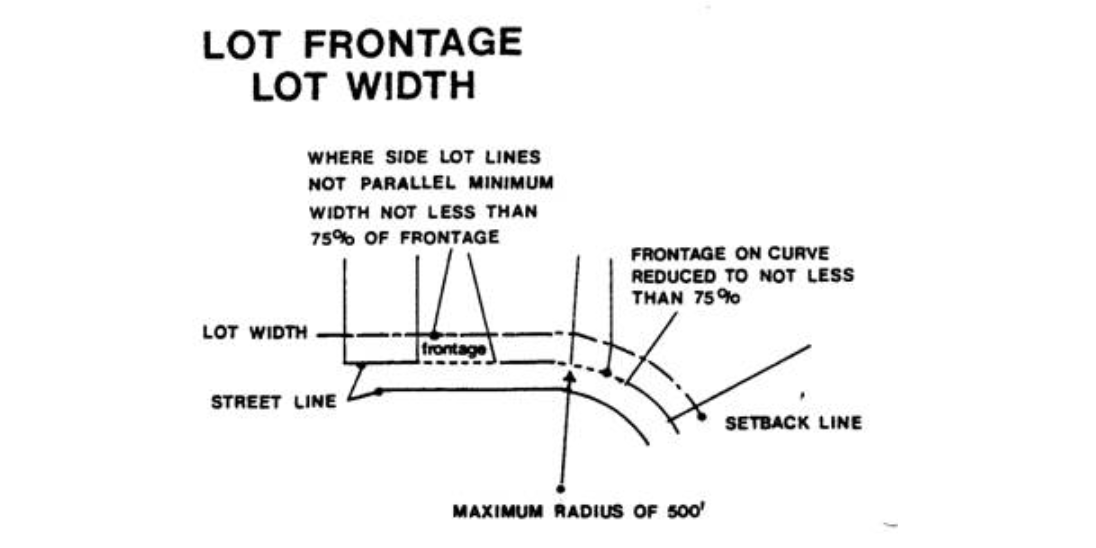

In [42]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

FireplaceQu

 - 변수 설명 : 벽난로 품질
 - 처리 방법 : Nan값은 벽난로가 없는것을 표기한것으로 None 값으로 변환

In [43]:
all_data['FireplaceQu']=all_data['FireplaceQu'].fillna('None')

Fence

 - 변수 설명 : 울타리 품질
 - 처리 방법 : Nan값은 울타리가 없는 것이며, None 값으로 변환

In [44]:
all_data['Fence']=all_data['Fence'].fillna('None')

Alley

 - 처리 방법 : Grvl,Pave 2가지의 카테고리값으로 이루어져있으며 Nan값은 인접한 골목이 없는것을 표기한것으로 None 값으로 변환

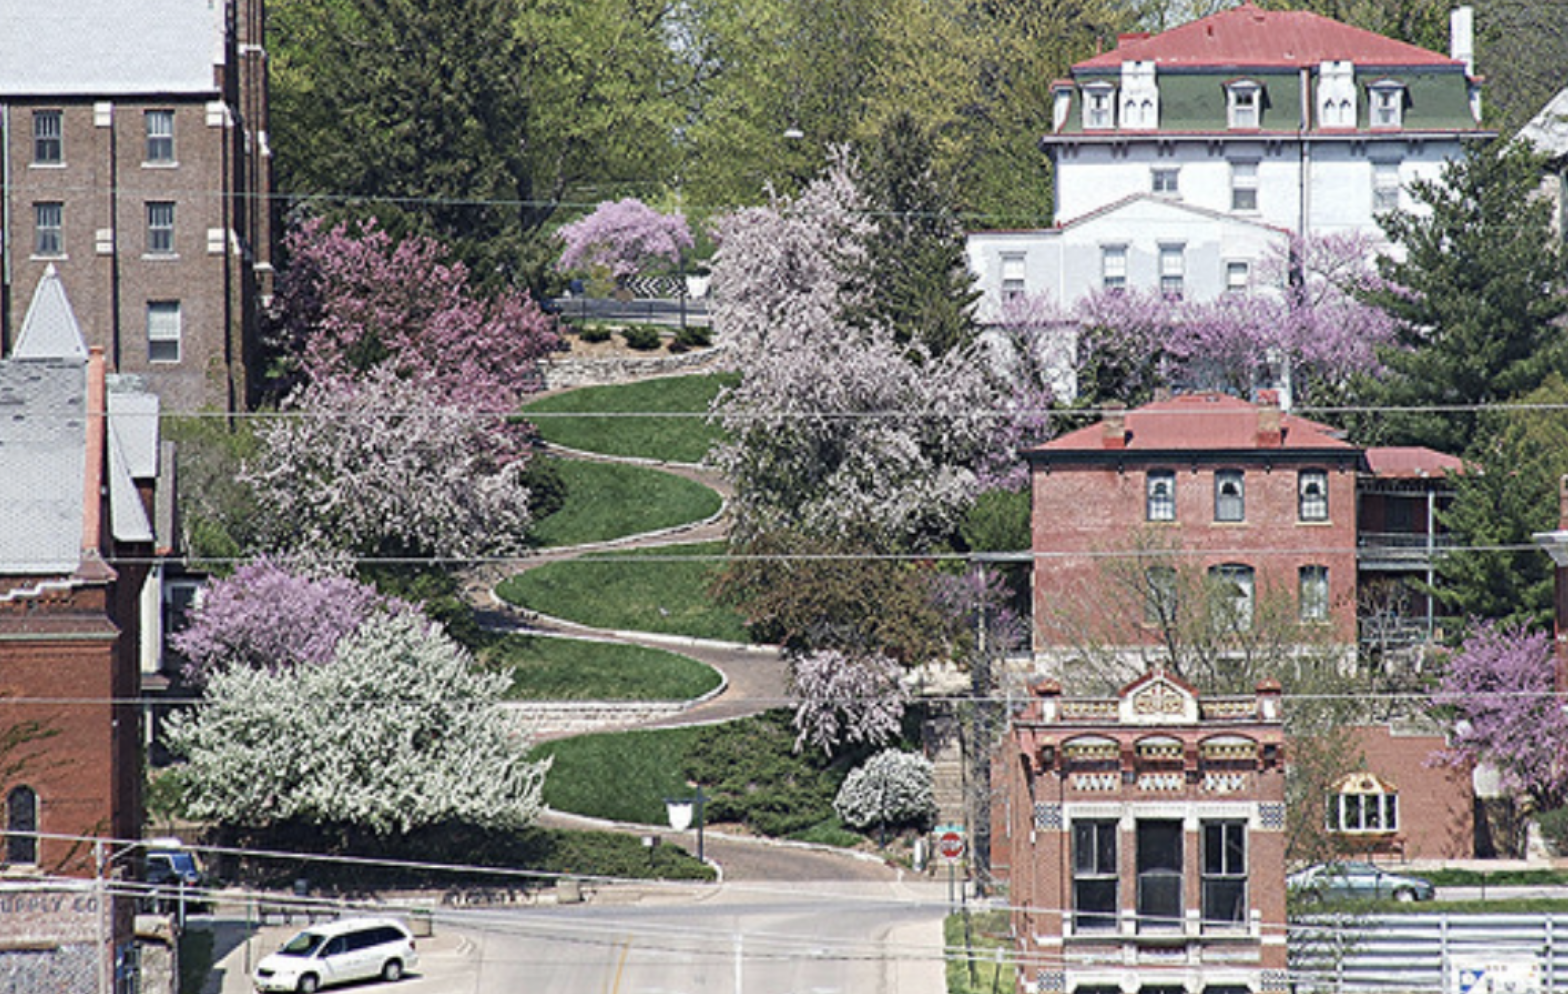

In [45]:
all_data['Alley']=all_data['Alley'].fillna('None')

# 수정

Functional

 - 변수 설명 : 집의 용도
 - 처리 방법 : 전체의 93%이상의 데이터가 Typ형식으로 이루어져있어 nan값들은 이 기능들에 포함되는 집이라 예측할 수 있어 Typ으로 대체

In [8]:
all_data['Functional']= all_data["Functional"].fillna("Typ")

MiscFeature 

 - 변수 설명 : 범주에 나타나지 않은 기타 기능들
 - 처리 방법 : nan값들은 이 기능들을 포함하고 있지 않은 집이므로 none값으로 대체

In [46]:
all_data['MiscFeature']=all_data['MiscFeature'].fillna('None')

PoolQC

 - 변수 설명 : 수영장 품질
 - 처리 방법 : nan값들은 수영장을 포함하고 있지 않은 집이므로 none값으로 대체

In [47]:
all_data['PoolQC']=all_data['PoolQC'].fillna('None')

In [17]:
all_data['Exterior1st'].describe()

count        2918
unique         15
top       VinylSd
freq         1025
Name: Exterior1st, dtype: object

# 수 정

Exterior1st & Exterior2nd

 - 변수 설명 : 주택의 외장재
 - 처리 방법 : 대부분의 외장재가 VinylSd로 되어있어 VinylSd로 예측 nan값을 mode로 채워준다.

In [18]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

TotalSF [변수 추가]

 - 변수 설명 : 전체 집의 사이즈 
 - 처리 방법 : 전체 집 사이즈는 지하실과 1층, 2층의 공간사이즈를 모두 합하여 처리함

### 2-2 변수간의 상관관계 (Correlation)

#### 2-2-1 정량적 변수 (Numerical Features)
정량적 변수간의 상관관계를 Heatmap으로 확인 

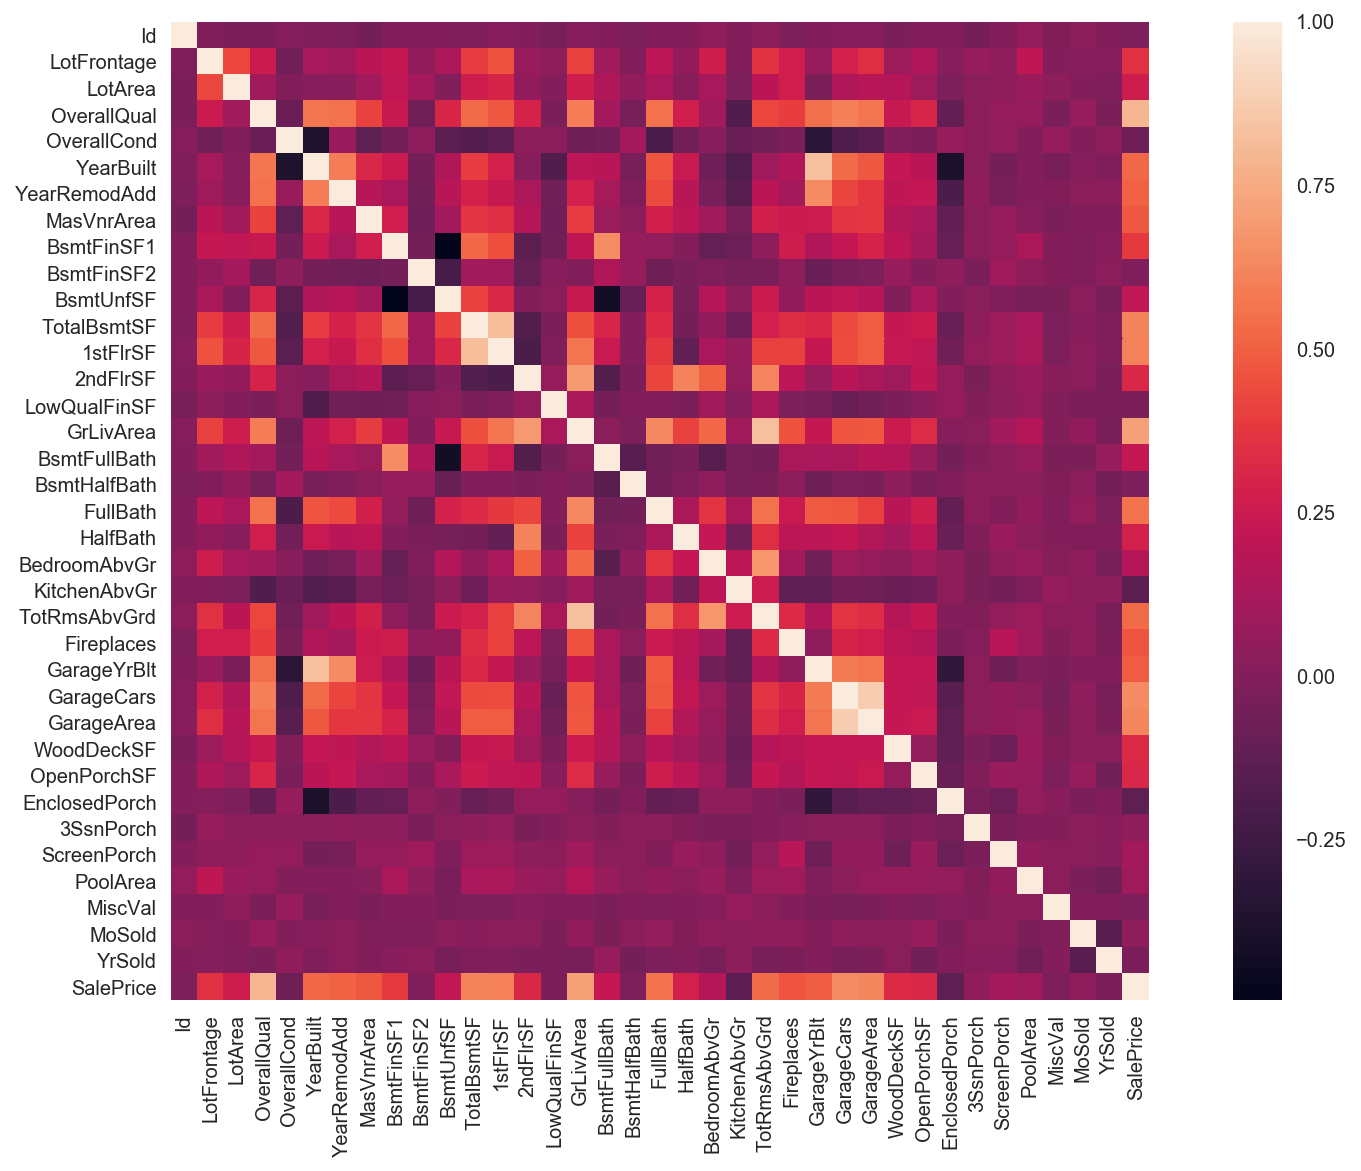

In [48]:
corrmat = train.corr()
f, ax = plt.subplots(figsize = (15,9))
sns.heatmap(corrmat, vmax = 1, square=True)

타겟 데이터(SalePrice)와 상관관계가 높은 순서대로 15개 추출

In [49]:
k = 15

cor_numerical_cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index 
print("정량적 변수(Numerical Features)의 갯수 :" ,len(cor_numerical_cols), "\n")
print("정량적 변수(Numerical Features)       : \n",list(cor_numerical_cols))

정량적 변수(Numerical Features)의 갯수 : 15 

정량적 변수(Numerical Features)       : 
 ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1']


#### 2-2-2 정성적 변수 (Categorical Features)

In [50]:
train_cat = train[categorical_features]
y_train_d = train['SalePrice']

# train_cat = pd.concat([y_train_d, train_cat], axis=1)

In [51]:
train_cat_dummies = pd.get_dummies(train_cat)

In [52]:
train_cat = pd.concat([y_train_d, train_cat_dummies], axis=1)

In [53]:
corrmat2 = train_cat.corr()

In [54]:
k = 10

cor_categorical_cols = corrmat2.nlargest(k, 'SalePrice')['SalePrice'].index 
cor_categorical_cols

Index(['SalePrice', 'BsmtQual_Ex', 'KitchenQual_Ex', 'Foundation_PConc',
       'ExterQual_Gd', 'ExterQual_Ex', 'BsmtFinType1_GLQ', 'HeatingQC_Ex',
       'GarageFinish_Fin', 'Neighborhood_NridgHt'],
      dtype='object')

### 2-3 1차 변수 선정 (By OLS Model)

#### 2-3-1 정량적 변수 (Numerical Features) 사용

In [55]:
# Train, Test 데이터 준비
train = all_data[:ntrain]
test = all_data[ntrain:]

train = sm.add_constant(train)
train.tail()

const  1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType  \
1455    1.0       953       694          0  None             3     1Fam   
1456    1.0      2073         0          0  None             3     1Fam   
1457    1.0      1188      1152          0  None             4     1Fam   
1458    1.0      1078         0          0  None             2     1Fam   
1459    1.0      1256         0          0  None             3     1Fam   

     BsmtCond BsmtExposure  BsmtFinSF1  ...    SalePrice SaleType ScreenPorch  \
1455       TA           No         0.0  ...     175000.0       WD           0   
1456       TA           No       790.0  ...     210000.0       WD           0   
1457       Gd           No       275.0  ...     266500.0       WD           0   
1458       TA           Mn        49.0  ...     142125.0       WD           0   
1459       TA           No       830.0  ...     147500.0       WD           0   

      Street  TotRmsAbvGrd TotalBsmtSF  WoodDeckSF YearBuilt YearRemodAdd  \
1455    Pave             7       953.0           0      1999         2000   
1456    Pave             7      1542.0         349      1978         1988   
1457    Pave             9      1152.0           0      1941         2006   
1458    Pave             5      1078.0         366      1950         1996   
1459    Pave             6      1256.0         736      1965         1965   

     YrSold  
1455   2007  
1456   2010  
1457   2010  
1458   2010  
1459   2008  

[5 rows x 81 columns]

In [56]:
#Numerical features로 train 데이터 만들기
train_n = train[numerical_features]

#Numerical features로 이루어진 데이터 중 Id와 SalePrice를 제외시킴
train_n = train_n.drop(['Id', 'SalePrice'], axis=1)

#SalePrice에 로그를 적용해서 정규화진행
y_train_l = np.log1p(y_train_d)

In [57]:
#OLS 모델에 적용 후 model1_1으로 저장
model1_1 = sm.OLS(y_train_l, train_n)
result1_1 = model1_1.fit()
print(result1_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.902e+05
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        14:27:58   Log-Likelihood:                 729.12
No. Observations:                1460   AIC:                            -1392.
Df Residuals:                    1427   BIC:                            -1218.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
LotFrontage       0.0002      0.000      1.009

#### 2-3-2 정성적 변수 (Categorical Features) 사용

In [58]:
#Utilities은 제외함
categorical_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

#Categorical features로 이뤄진 데이터를 더미로 변환
train_c = pd.get_dummies(train[categorical_features])
train_c.tail()

MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
1455               0               0               0               0   
1456               0               0               0               0   
1457               0               0               0               0   
1458               0               0               0               0   
1459               0               0               0               0   

      MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
1455              0              0              0              0   
1456              1              0              0              0   
1457              0              0              0              0   
1458              1              0              0              0   
1459              1              0              0              0   

      MSSubClass_50  MSSubClass_60          ...            SaleType_ConLw  \
1455              0              1          ...                         0   
1456              0              0          ...                         0   
1457              0              0          ...                         0   
1458              0              0          ...                         0   
1459              0              0          ...                         0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
1455             0             0            1                      0   
1456             0             0            1                      0   
1457             0             0            1                      0   
1458             0             0            1                      0   
1459             0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
1455                     1                      0  
1456                     1                      0  
1457                     1                      0  
1458                     1                      0  
1459                     1                      0  

[5 rows x 277 columns]

In [59]:
#OLS 모델에 적용 후 model1_2으로 저장
model1_2 = sm.OLS(y_train_l, train_c)
result1_2 = model1_2.fit()
print(result1_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     40.69
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        14:27:59   Log-Likelihood:                 837.36
No. Observations:                1460   AIC:                            -1215.
Df Residuals:                    1230   BIC:                             1.107
Df Model:                         229                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass_120            0.02

#### 2-3-3 정량적 변수와  정성적 변수를 함께 사용

In [60]:
#정량적 데이터와 정성적(더미) 데이터를 결합
train_all = pd.concat([train_n, train_c], axis=1)
train_all.tail()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1455         62.0     7917            6            5       1999          2000   
1456         85.0    13175            6            6       1978          1988   
1457         66.0     9042            7            9       1941          2006   
1458         68.0     9717            5            6       1950          1996   
1459         75.0     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF          ...            \
1455         0.0         0.0         0.0      953.0          ...             
1456       119.0       790.0       163.0      589.0          ...             
1457         0.0       275.0         0.0      877.0          ...             
1458         0.0        49.0      1029.0        0.0          ...             
1459         0.0       830.0       290.0      136.0          ...             

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1455               0             0             0            1   
1456               0             0             0            1   
1457               0             0             0            1   
1458               0             0             0            1   
1459               0             0             0            1   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
1455                      0                      0                     0   
1456                      0                      0                     0   
1457                      0                      0                     0   
1458                      0                      0                     0   
1459                      0                      0                     0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
1455                     0                     1                      0  
1456                     0                     1                      0  
1457                     0                     1                      0  
1458                     0                     1                      0  
1459                     0                     1                      0  

[5 rows x 312 columns]

In [61]:
#OLS 모델에 적용 후 model1_3으로 저장
model1_3 = sm.OLS(y_train_l, train_all)
result1_3 = model1_3.fit()
print(result1_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     78.79
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        14:27:59   Log-Likelihood:                 1388.5
No. Observations:                1460   AIC:                            -2251.
Df Residuals:                    1197   BIC:                            -860.8
Df Model:                         262                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage               0.00

#### 2-3-4 정량적 변수와 종속변수 (SalePrice)  상관계수 Top 14 사용

In [62]:
#상관계수가 높은 15개 정량적 변수 저장
cor_numerical_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1']

#15개의 정량적 변수를 이용하여 데이터 만들기
train_nc = train[cor_numerical_cols]
train_nc.tail()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
1455            6       1647         2.0       460.0        953.0       953   
1456            6       2073         2.0       500.0       1542.0      2073   
1457            7       2340         1.0       252.0       1152.0      1188   
1458            5       1078         1.0       240.0       1078.0      1078   
1459            5       1256         1.0       276.0       1256.0      1256   

      FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  GarageYrBlt  \
1455         2             7       1999          2000       1999.0   
1456         2             7       1978          1988       1978.0   
1457         2             9       1941          2006       1941.0   
1458         1             5       1950          1996       1950.0   
1459         1             6       1965          1965       1965.0   

      MasVnrArea  Fireplaces  BsmtFinSF1  
1455         0.0           1         0.0  
1456       119.0           2       790.0  
1457         0.0           2       275.0  
1458         0.0           0        49.0  
1459         0.0           0       830.0

In [63]:
#OLS 모델에 적용 후 model1_4 로 저장
model1_4 = sm.OLS(y_train_l, train_nc)
result1_4 = model1_4.fit()
print(result1_4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.646e+05
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        14:27:59   Log-Likelihood:                 579.47
No. Observations:                1460   AIC:                            -1131.
Df Residuals:                    1446   BIC:                            -1057.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual      0.0816      0.005     16.743   

#### 2-3-5 상관계수가 높은 정량적 변수 14개와 정성적 변수 5개 사용

In [64]:
#정성적 변수 5개를 이용하여 데이터 만들기
cor_categorical_cols = ['Neighborhood', 'ExterQual', 'KitchenQual',
       'BsmtQual', 'PoolQC']
train_cc = train[cor_categorical_cols]

#정량적 변수와 정성적 변수 결합
train_all_c = pd.concat([train_nc, train_cc], axis=1)
train_all_c.tail()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
1455            6       1647         2.0       460.0        953.0       953   
1456            6       2073         2.0       500.0       1542.0      2073   
1457            7       2340         1.0       252.0       1152.0      1188   
1458            5       1078         1.0       240.0       1078.0      1078   
1459            5       1256         1.0       276.0       1256.0      1256   

      FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  GarageYrBlt  \
1455         2             7       1999          2000       1999.0   
1456         2             7       1978          1988       1978.0   
1457         2             9       1941          2006       1941.0   
1458         1             5       1950          1996       1950.0   
1459         1             6       1965          1965       1965.0   

      MasVnrArea  Fireplaces  BsmtFinSF1 Neighborhood ExterQual KitchenQual  \
1455         0.0           1         0.0      Gilbert        TA          TA   
1456       119.0           2       790.0       NWAmes        TA          TA   
1457         0.0           2       275.0      Crawfor        Ex          Gd   
1458         0.0           0        49.0        NAmes        TA          Gd   
1459         0.0           0       830.0      Edwards        Gd          TA   

     BsmtQual PoolQC  
1455       Gd   None  
1456       Gd   None  
1457       TA   None  
1458       TA   None  
1459       TA   None

In [65]:
#데이터를 더미 시킨 후 Constant변수 추가 
train_all_c = pd.get_dummies(train_all_c)
train_all_c = sm.add_constant(train_all_c)

train_all_c.tail()

const  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
1455    1.0            6       1647         2.0       460.0        953.0   
1456    1.0            6       2073         2.0       500.0       1542.0   
1457    1.0            7       2340         1.0       252.0       1152.0   
1458    1.0            5       1078         1.0       240.0       1078.0   
1459    1.0            5       1256         1.0       276.0       1256.0   

      1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt     ...       \
1455       953         2             7       1999     ...        
1456      2073         2             7       1978     ...        
1457      1188         2             9       1941     ...        
1458      1078         1             5       1950     ...        
1459      1256         1             6       1965     ...        

      KitchenQual_TA  BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_None  \
1455               1            0            0            1              0   
1456               1            0            0            1              0   
1457               0            0            0            0              0   
1458               0            0            0            0              0   
1459               1            0            0            0              0   

      BsmtQual_TA  PoolQC_Ex  PoolQC_Fa  PoolQC_Gd  PoolQC_None  
1455            0          0          0          0            1  
1456            0          0          0          0            1  
1457            1          0          0          0            1  
1458            1          0          0          0            1  
1459            1          0          0          0            1  

[5 rows x 57 columns]

In [66]:
#OLS 모델에 적용 후 model1_5 로 저장
model1_5 = sm.OLS(y_train_l, train_all_c)
result1_5 = model1_5.fit()
print(result1_5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     186.7
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        14:27:59   Log-Likelihood:                 764.76
No. Observations:                1460   AIC:                            -1426.
Df Residuals:                    1408   BIC:                            -1151.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.5701 

#### 2-3-6 변수간 다중공선성과 분산분석 

#### (1) 변수간 다중공선성

 - 다중공선성(multicollinearity)란 독립 변수의 일부가 다른 독립 변수의 조합으로 표현될 수 있는 경우를 말하며, 독립변수들이 서로 독립이 아니라 상호상관관계가 강한 경우 발생함
 - 다중 공선성이 있으면 독립변수의 공분산 행렬의 조건수(conditional number)가 증가
 - 상호의존적인 독립변수를 선택하는 방법으로는 VIF(Variance Inflation Factor)를 사용하며 숫자가 높을수록 다른 변수에 의존적임을 알 수 있음
 $$
 \text{VIF}_i = \frac{\sigma^2}{(n-1)\text{Var}[X_i]}\cdot \frac{1}{1-R_i^2}
 $$

In [67]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_all_c.values, i) for i in range(train_all_c.values.shape[1])]
vif["features"] = train_all_c.columns
vif.sort_values("VIF Factor", ascending = True).head(20)

VIF Factor              features
0     0.000000                 const
13    1.643349            Fireplaces
12    1.652147            MasVnrArea
14    1.681330            BsmtFinSF1
10    2.335998          YearRemodAdd
7     2.636634              FullBath
8     3.864906          TotRmsAbvGrd
1     3.916459           OverallQual
11    4.950406           GarageYrBlt
3     5.991592            GarageCars
6     6.084284              1stFlrSF
4     6.132851            GarageArea
2     6.714425             GrLivArea
5     7.010885           TotalBsmtSF
9     8.547164             YearBuilt
44         inf        KitchenQual_Ex
37         inf  Neighborhood_StoneBr
38         inf   Neighborhood_Timber
39         inf  Neighborhood_Veenker
40         inf          ExterQual_Ex

#### Comment :

1. 정성적 변수 (Categorical Features) 제외하고 추출된 변수들 간의 다중공선성은 낮게 형성되어 있음 

#### (2) 정성적 변수 (Categorical Features)에 대한 분산 분석

 - 분산 분석(ANOVA: Analysis of Variance)은 종속변수의 분산과 독립변수의 분산간의 관계를 사용하여 선형회귀분석의 성능을 평가하고자 하는 방법
 - 분산 분석은 서로 다른 두 개의 선형회귀분석의 성능 비교에 응용할 수 있으며 독립변수가 카테고리 변수인 경우 각 카테고리 값에 따른 영향을 정량적으로 분석하는데도 사용
 - TSS : 종속변수값의 움직임의 범위
 - ESS : 모형에서 나온 예측밧의 움직임의 범위
 - RSS : 잔차의 움직임의 범위, 즉 오차의 크기
 
 $$
 \dfrac{\text{ESS}}{K-1} \div  \dfrac{\text{RSS}}{N-K} = \dfrac{R^2/(K-1)}{(1-R^2)/(N-K)} \sim F(K-1, N-K)
 $$

- 분산 분석표
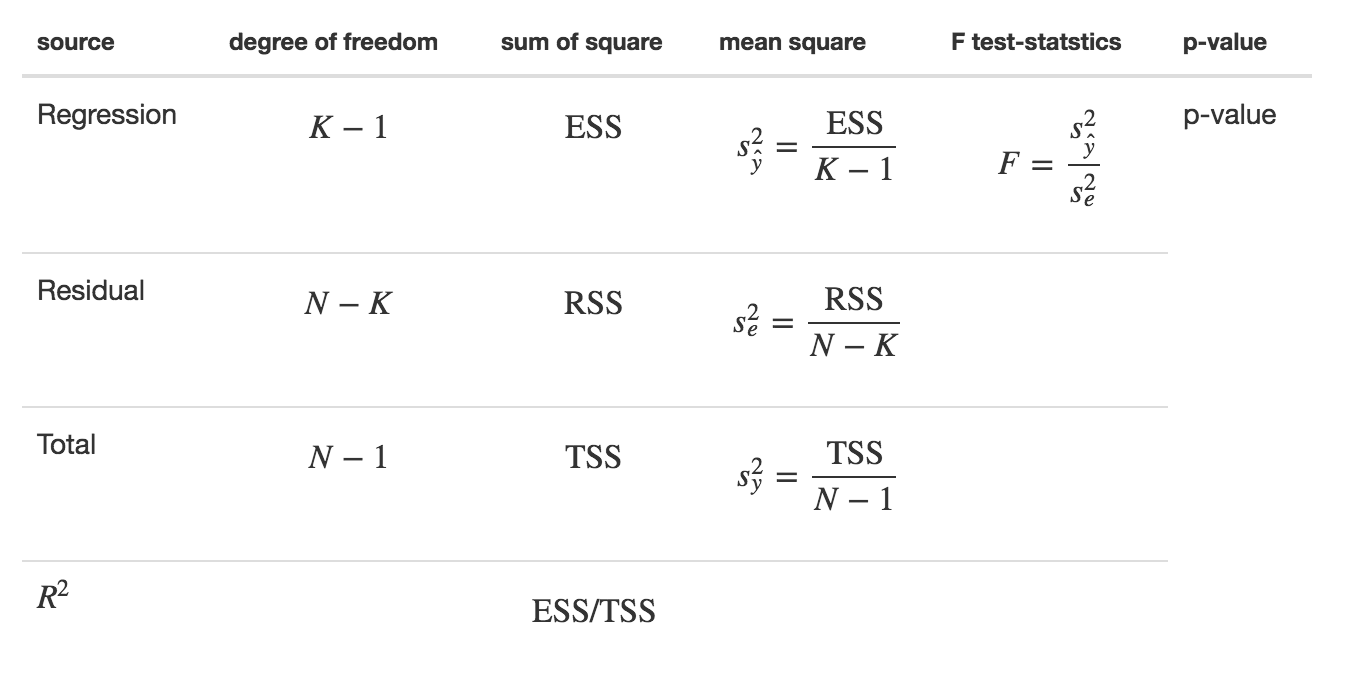

In [68]:
#Neighborhood
model_cat = sm.OLS.from_formula("SalePrice ~ C(Neighborhood)", data=train)
sm.stats.anova_lm(model_cat.fit())

df        sum_sq       mean_sq          F         PR(>F)
C(Neighborhood)    24.0  5.023606e+12  2.093169e+11  71.784865  1.558600e-225
Residual         1435.0  4.184305e+12  2.915892e+09        NaN            NaN

In [69]:
#ExterQual
model_cat = sm.OLS.from_formula("SalePrice ~ C(ExterQual)", data=train)
sm.stats.anova_lm(model_cat.fit())

df        sum_sq       mean_sq           F         PR(>F)
C(ExterQual)     3.0  4.395744e+12  1.465248e+12  443.334831  1.439551e-204
Residual      1456.0  4.812167e+12  3.305060e+09         NaN            NaN

In [70]:
#KitchenQual
model_cat = sm.OLS.from_formula("SalePrice ~ C(KitchenQual)", data=train)
sm.stats.anova_lm(model_cat.fit())

df        sum_sq       mean_sq           F         PR(>F)
C(KitchenQual)     3.0  4.204320e+12  1.401440e+12  407.806352  3.032213e-192
Residual        1456.0  5.003592e+12  3.436533e+09         NaN            NaN

In [71]:
#BsmtQual
model_cat = sm.OLS.from_formula("SalePrice ~ C(BsmtQual)", data=train)
sm.stats.anova_lm(model_cat.fit())

df        sum_sq       mean_sq           F         PR(>F)
C(BsmtQual)     4.0  4.281621e+12  1.070405e+12  316.148635  8.158548e-196
Residual     1455.0  4.926290e+12  3.385766e+09         NaN            NaN

In [72]:
#PoolQC
model_cat = sm.OLS.from_formula("SalePrice ~ C(PoolQC)", data=train)
sm.stats.anova_lm(model_cat.fit())

df        sum_sq       mean_sq          F        PR(>F)
C(PoolQC)     3.0  1.951702e+11  6.505672e+10  10.509853  7.700989e-07
Residual   1456.0  9.012741e+12  6.190069e+09        NaN           NaN

#### Comments :
1.

2.

#### 2-3-6 변수사용별 성능비교

 1) $R_{adj}^2$ 모델별 비교 
 - 선형 회귀 모형에서 독립 변수가 추가되면 결정 계수$( R^2 )$의 값은 항상 증가함
 
 - 독립 변수 추가 효과를 상쇄하기위해 독립변수 갯수 K에 따라 결정 계수의 값을 조정하는 
   계수가 $R^2$이며, 1에 가까울수록 좋은 모형이라고 할 수 있음
$$
R_{adj}^2 = 1 - \frac{n-1}{n-K}(1-R^2) = \dfrac{(n-1)R^2 +1-K}{n-K}
$$

In [73]:
print("result1_1.rsquared_adj :", result1_1.rsquared_adj)
print("result1_2.rsquared_adj :", result1_2.rsquared_adj)
print("result1_3.rsquared_adj :", result1_3.rsquared_adj)
print("result1_4.rsquared_adj :", result1_4.rsquared_adj)
print("result1_5.rsquared_adj :", result1_5.rsquared_adj)

result1_1.rsquared_adj : 0.999847559217
result1_2.rsquared_adj : 0.861679864865
result1_3.rsquared_adj : 0.933196578693
result1_4.rsquared_adj : 0.999815332286
result1_5.rsquared_adj : 0.866532188592


2) AIC (Akaike Information Criterion) 모델별 비교
 - AIC는 모형과 데이터의 확률 분포 사이의 Kullback-Leibler 수준을 가장 크게하며, 값이 작을수록 좋은 모형에 가깝움

$$
           \text{AIC} = -2\log L + 2K \
$$


In [74]:
print("result1_1.aic :", result1_1.aic)
print("result1_2.aic :", result1_2.aic)
print("result1_3.aic :", result1_3.aic)
print("result1_4.aic :", result1_4.aic)
print("result1_5.aic :", result1_5.aic)

result1_1.aic : -1392.24546639
result1_2.aic : -1214.71731639
result1_3.aic : -2251.03522292
result1_4.aic : -1130.93284476
result1_5.aic : -1425.52673203


3) BIC 모델별 비교
 - BIC는 데이터가 exponential family라는 가정하에 주어진 데이터에서 모형 likelihood를 측정하기 위한 값에서 유도되었으며, 값은 작을수록 좋은 모형에 가깝움

$$
           \text{BIC} = -2\log L + K\log n\
$$


In [75]:
print("result1_1.bic :", result1_1.bic)
print("result1_2.bic :", result1_2.bic)
print("result1_3.bic :", result1_3.bic)
print("result1_4.bic :", result1_4.bic)
print("result1_5.bic :", result1_5.bic)

result1_1.bic : -1217.80113981
result1_2.bic : 1.10677798699
result1_3.bic : -860.766801957
result1_4.bic : -1056.92616075
result1_5.bic : -1150.64476287


#### Comment : 

1. Adj. $R^2$: 모델 1과 4번째가 0.99로 가장 높고 비슷한 성능이 나옴
2. AIC : 
3. BIC : 

### 2-4 아웃라이어

1) IQR (Interquartile Range)를 이용한 아웃라이어 선택

 - IQR : 3사분위수(Q3)과 1사분위수(Q1)의 차이 (Q3 - Q1)
 - 박스-휘스커 플롯(Box-Whisker Plot) 외부 세로선은 1.5 X IQR 을 나타내며 그 선 바깥 점을 아웃라이어라고 함

In [87]:
#IQR 아웃라이어 함수
def detect_outliers(data, feature):
    
    Q1 = np.percentile(data[feature], 25)
    Q3 = np.percentile(data[feature], 75)
    IQR = Q3 - Q1
        
    outlier_lenth = 1.5 * IQR
        
    outliers = data[(data[feature] < Q1 - outlier_lenth) | (data[feature] > Q3 + outlier_lenth)].index.tolist()

    return outliers

In [92]:
# GrLivArea, OverallQual, GarageArea 
GrLivArea_outliers = detect_outliers(train, "GrLivArea")
OverallQual_outliers = detect_outliers(train, "OverallQual")
GarageCars_outliers = detect_outliers(train, "GarageArea")

2) 표준화 잔차(resid)를 이용한 아웃라이어 선택

 - 잔차를 레버리지와 잔차의 표준 편차로 나누어 동일한 표준 편차를 가지도록 스케일링한 것을 표준화 잔차(standardized residual 또는 normalized residual 또는 studentized residual) 라고 함
 
$$ 
r_i = \dfrac{e_i}{s\sqrt{1-h_{ii}}} 
$$

 - StatsModels의 RegressionResult(선형회귀 결과)의 resid_pearson 속성을 이용하여 표준화 잔차를 확인할 수 있으며, 2~4 보다 크면 아웃라이어라 함

In [84]:
#model1_1에서 결과물에 대한 표준화 잔차 속성을 이용하여 2보다 큰 것을 아웃라이어로 지정
idx_r = np.where(result1_1.resid_pearson > 2)[0]

3) Cook's Distance 이용한 아웃라이어 선택

 - 레버리지와 잔차의 크기가 모두 커지면 Cook's Distance 또한 커짐 

$$ 
D_i = \frac{r_i^2}{\text{RSS}}\left[\frac{h_{ii}}{(1-h_{ii})^2}\right]
$$

 - Fox' Outlier Recommendation 은 Cook's Distance가 다음과 같은 기준값보다 클 때 아웃라이어로 판단
 
 $$
 D_i > \dfrac{4}{N − K - 1}
 $$

In [85]:
#model1_1에서 결과물에 대한 Fox' Outlier Recommendation 을 이용하여 아웃라이어로 지정
influence = result1_1.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y_train_l) - len(train_n.columns) - 1)
idx_c = np.where(cooks_d2 > fox_cr)[0]

4) 전체 아웃라이어 확인

In [96]:
resid_outliers = idx_r.tolist()
cooks_outliers = idx_c.tolist()
print("resid_outliers:", len(resid_outliers),"개 \n", resid_outliers)
print("\t")
print("cooks_outliers:", len(cooks_outliers),"개 \n", cooks_outliers)
print("\t")
print("(IQR)GrLivArea_outliers:", len(GrLivArea_outliers),"개 \n", GrLivArea_outliers)
print("\t")
print("(IQR)OverallQual_outliers", len(OverallQual_outliers),"개 \n", OverallQual_outliers)
print("\t")
print("(IQR)GarageCars_outliers:", len(GarageCars_outliers),"개 \n", GarageCars_outliers)

#제거하길 추천한 outliers(data description)
recommended_outliers = [523, 898, 1298]

resid_outliers: 26 개 
 [48, 142, 151, 178, 181, 218, 277, 378, 457, 473, 546, 669, 681, 688, 803, 807, 898, 970, 1046, 1059, 1065, 1075, 1170, 1181, 1182, 1423]
	
cooks_outliers: 68 개 
 [30, 48, 88, 93, 125, 142, 144, 153, 178, 197, 205, 218, 277, 335, 346, 378, 410, 431, 457, 462, 479, 495, 523, 546, 588, 608, 628, 632, 635, 658, 662, 664, 666, 691, 705, 710, 728, 803, 807, 810, 812, 898, 907, 916, 942, 968, 970, 1030, 1048, 1059, 1062, 1068, 1080, 1170, 1181, 1182, 1211, 1216, 1298, 1324, 1337, 1345, 1386, 1415, 1423, 1432, 1437, 1453]
	
(IQR)GrLivArea_outliers: 31 개 
 [58, 118, 185, 197, 231, 304, 324, 496, 523, 583, 608, 635, 691, 769, 798, 803, 961, 1024, 1031, 1046, 1142, 1169, 1173, 1175, 1182, 1268, 1298, 1312, 1328, 1353, 1386]
	
(IQR)OverallQual_outliers 2 개 
 [375, 533]
	
(IQR)GarageCars_outliers: 21 개 
 [178, 224, 270, 317, 408, 581, 664, 718, 803, 825, 1061, 1087, 1142, 1184, 1190, 1228, 1241, 1268, 1298, 1350, 1417]


5) 아웃라이어 집단의 조합

 - IQR [ GrLivArea_outliers , OverallQual_outliers, GarageCars_outlier ] 아웃라이어

In [98]:
IQR = list(set(GrLivArea_outliers) | set(OverallQual_outliers) | set(GarageCars_outliers))
print("IQR outliers :", len(IQR),"개 \n", IQR)

IQR outliers: 50 개 
 [1024, 769, 1031, 1417, 523, 270, 1169, 1298, 1173, 1046, 1175, 533, 664, 408, 798, 1182, 1312, 1184, 803, 1061, 1190, 304, 1328, 178, 691, 185, 58, 825, 317, 1087, 961, 324, 197, 581, 583, 1350, 1353, 1228, 718, 1241, 608, 224, 231, 1386, 496, 1268, 118, 375, 1142, 635]


 - IQR2 [ GrLivArea_outliers,  GarageCars_outlier ] 아웃라이어

In [100]:
IQR2 = list(set(GrLivArea_outliers) & set(GarageCars_outliers))
print("IQR2 outliers :", len(IQR2),"개 \n", IQR2)

IQR2 outliers : 4 개 
 [1298, 803, 1268, 1142]


 - Resid & Cook distance 아웃라이어

In [103]:
resid_cooks = list(set(resid_outliers) | set(cooks_outliers))
print("Resid_Cooks_distance :", len(Resid_Cooks_distance),"개 \n", Resid_Cooks_distance)

Resid_Cooks_distance : 77 개 
 [1030, 523, 1298, 277, 1046, 1048, 30, 546, 803, 1059, 1062, 807, 1065, 810, 812, 1068, 1324, 48, 1075, 1080, 1337, 1345, 588, 335, 88, 346, 93, 608, 1386, 628, 632, 378, 635, 125, 898, 1415, 907, 142, 1423, 144, 1170, 658, 916, 662, 151, 664, 153, 410, 666, 1432, 669, 1181, 1182, 1437, 681, 1453, 942, 431, 688, 178, 691, 181, 1211, 1216, 705, 197, 710, 968, 457, 970, 205, 462, 728, 473, 218, 479, 495]


 - Resid & Cook distance & IQR 아웃라이어

In [104]:
resid_cooks_IQR = list(set(resid_cooks) | set(IQR))
print("Resid_Cooks_distance :", len(Resid_Cooks_distance),"개 \n", Resid_Cooks_distance)

[1024, 769, 1030, 1031, 523, 270, 1298, 277, 1046, 533, 1048, 1175, 30, 798, 1312, 546, 803, 1059, 1061, 1062, 807, 1065, 810, 812, 1068, 1324, 48, 304, 1328, 1075, 1080, 1337, 58, 825, 317, 1087, 1345, 324, 581, 1350, 583, 1353, 588, 335, 88, 346, 93, 608, 1386, 628, 118, 375, 632, 1142, 378, 635, 125, 898, 1415, 1417, 907, 142, 1423, 144, 1169, 1170, 658, 916, 1173, 662, 151, 664, 153, 410, 666, 1432, 669, 1181, 1182, 1437, 408, 1184, 1190, 681, 1453, 942, 431, 688, 178, 691, 181, 185, 1211, 1216, 705, 961, 197, 710, 968, 457, 970, 1228, 205, 462, 718, 728, 473, 218, 1241, 479, 224, 231, 495, 496, 1268]


# 수정 

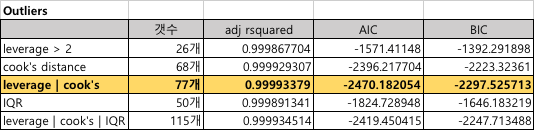

#### partial regression plot & CCPR

In [ ]:
# fig = plt.figure(figsize=(8,30))
# sm.graphics.plot_partregress_grid(result1_1, fig=fig)
# fig.suptitle("")
# plt.show

In [ ]:
# fig = plt.figure(figsize=(15,40))
# sm.graphics.plot_ccpr_grid(result1_1, fig=fig)
# fig.suptitle("")
# plt.show

## Outliers

In [ ]:
influence = result1_1.get_influence()
# hat = influence.hat_matrix_diag

# plt.figure(figsize=(15,6))
# plt.stem(hat)
# plt.show()

In [ ]:
# hat.sum()

In [ ]:
# plt.figure(figsize=(15, 6))
# plt.stem(result1_1.resid_pearson)
# plt.show()

In [ ]:
# g = sm.graphics.plot_leverage_resid2(result1_1)
# g.set_size_inches(15,5)
# plt.show()

In [ ]:
o_train = train[result1_1.resid_pearson > 2]
print(len(o_train))
idx_r = np.where(result1_1.resid_pearson > 2)[0]
print(idx_r)

In [ ]:
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y_train_l) - len(train_n.columns) - 1)
idx_c = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(train['GrLivArea'], y_train_d)
plt.scatter(train['GrLivArea'][idx_c], y_train_d[idx_c], s=100, c="r", alpha=0.3)
utils.annotate_axes(range(len(idx_c)), idx_c, 
                    list(zip(train['GrLivArea'][idx_c], y_train_d[idx_c])), [(-20, 15)] * len(idx_c), size="small", ax=ax)
plt.show()

print(len(idx_c),idx_c)

In [ ]:
resid_outliers = idx_r.tolist()
cooks_outliers = idx_c.tolist()
print("resid_outliers:", len(resid_outliers), resid_outliers)
print("\t")
print("cooks_outliers:", len(cooks_outliers), cooks_outliers)
print("\t")
print("(IQR)GrLivArea_outliers:", len(GrLivArea_outliers), GrLivArea_outliers)
print("\t")
print("(IQR)OverallQual_outliers", len(OverallQual_outliers), OverallQual_outliers)
print("\t")
print("(IQR)GarageCars_outliers:", len(GarageCars_outliers), GarageCars_outliers)

#제거하길 추천한 outliers(data description)
recommended_outliers = [523, 898, 1298]

In [ ]:
IQR = list(set(GrLivArea_outliers) | set(OverallQual_outliers) | set(GarageCars_outliers))
print(IQR)

In [ ]:
resid_cooks = list(set(resid_outliers) | set(cooks_outliers))
print(resid_cooks)

In [ ]:
IQR2 = list(set(GrLivArea_outliers) & set(GarageCars_outliers))
print(IQR2)

In [ ]:
resid_cooks_IQR = list(set(resid_cooks) | set(IQR))
print(resid_cooks_IQR)

## Select Variables

In [ ]:
idx_t = np.where(result1_1.pvalues < 0.05)[0]
print(len(idx_t), idx_t)
tvalues = idx_t.tolist()

In [ ]:
x_train_cols = train_n.columns.tolist()
print(len(x_train_cols))

select = []

for i in tvalues:
    select.append(x_train_cols[i])

print(len(select), select)

In [ ]:
idx_t2 = np.where(result1_3.pvalues < 0.005)[0]
print(len(idx_t2), idx_t2)
tvalues2 = idx_t2.tolist()

x_train_cols2 = train_all.columns.tolist()
print(len(x_train_cols2))

select_c = []

for i in tvalues2:
    select_c.append(x_train_cols2[i])

print(len(select_c), select_c)

select_c = ['MSZoning', 'Neighborhood', 'Condition2', 'RoofMatl', 'Functional']

In [ ]:
x_train_new = train_n[select]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.values.shape[1])]
vif["features"] = x_train_new.columns
vif.sort_values(by="VIF Factor", ascending=True)

- Yearsold, YearRemodAdd, TotRmsAbvGrd, OverallQual 제외

- ** OverrallCond, 1stFlrSF, KitchenAbvGr, PoolArea, Screenporch(from_formula 사용시)

In [ ]:
select = ['LotArea', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea']
print(len(select), select)

x_train_new = x_train_new[select]

- 참고 : 상관계수와 coef?

In [ ]:
print(len(cor_numerical_cols),cor_numerical_cols)
print("\t")

cols_common = set(select) & set(cor_numerical_cols)
cols_sum = set(select) | set(cor_numerical_cols)

print(len(cols_common), cols_common)
print("\t")
print(len(cols_sum), cols_sum)

In [ ]:
select = ['EnclosedPorch', '1stFlrSF', 'BsmtFinSF1', 'GarageCars', 'YearRemodAdd', 'BsmtFullBath', 'MasVnrArea', 'Fireplaces', 'TotalBsmtSF', 'PoolArea', 'OverallCond', 'ScreenPorch', 'WoodDeckSF', 'LotArea', 'YearBuilt', 'GarageArea', 'GrLivArea', 'KitchenAbvGr', 'TotRmsAbvGrd', 'FullBath', 'GarageYrBlt', 'OverallQual']
len(select)

In [ ]:
x_train_new = train_n[select]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.values.shape[1])]
vif["features"] = x_train_new.columns
vif.sort_values(by="VIF Factor", ascending=True)

## Second OLS

In [ ]:
train_cc = train[cor_categorical_cols]

In [ ]:
#추가 작업
train_cc = train_cc.drop(['PoolQC'], axis=1)

train_cc = train_cc.drop(resid_cooks)
train_n = train_n[select]
train_n = train_n.drop(resid_cooks)
#추가 작업-변수 변환 
train_n = np.log1p(train_n)
x_train_new = train_n
x_train_new = pd.concat([train_n, train_cc], axis=1)
#add constatns
# x_train_new = sm.add_constant(x_train_new)

y_train_new = y_train_d.drop(resid_cooks)
y_train_new = np.log1p(y_train_new)

# #from_formula 사용 위해
train_new = pd.concat([y_train_new, x_train_new], axis=1)
train_new.tail()

In [ ]:
select_scale = []

for num in select:
    x = "scale(" + num + ")"
    select_scale.append(x)

print(select_scale)

formula = " + ".join(select_scale)
formula

In [ ]:
train_cc.columns

In [ ]:
train_new.tail()

In [ ]:
train_new = train_new.drop(['1stFlrSF'], axis=1)
train_new.tail()

In [ ]:
# x_train_new = pd.get_dummies(x_train_new)
# x_train_new.tail()

In [ ]:
model2_1 = sm.OLS.from_formula("SalePrice ~ scale(EnclosedPorch) + scale(BsmtFinSF1) + scale(GarageCars) + scale(YearRemodAdd) + scale(BsmtFullBath) + scale(MasVnrArea) + scale(Fireplaces) + scale(TotalBsmtSF) + scale(PoolArea) + scale(OverallCond) + scale(ScreenPorch) + scale(WoodDeckSF) + scale(LotArea) + scale(YearBuilt) + scale(GarageArea) + scale(GrLivArea) + scale(KitchenAbvGr) + scale(TotRmsAbvGrd) + scale(FullBath) + scale(GarageYrBlt) + scale(OverallQual) + C(Neighborhood) + C(ExterQual) + C(KitchenQual) + C(BsmtQual)", data=train_new)
result2_1 = model2_1.fit()
print(result2_1.summary())

In [ ]:
# result2_2 = model2_1.fit_regularized(alpha=0.01, L1_wt=1)
# print(result2_2.params)

- RMSE

In [ ]:
# statsmodels.tools.eval_measures.rmse(x1, x2, axis=0)

- 잔차 정규성

In [ ]:
test_norm = sms.omni_normtest(result2_1.resid)
for xi in zip(['Chi^2', 'P-value'], test_norm):
    print("%-12s: %6.3f" % xi)

In [ ]:
sp.stats.probplot(result2_1.resid, plot=plt)
plt.show()

In [ ]:
# select_new = ['EnclosedPorch', '1stFlrSF', 'BsmtFinSF1', 'GarageCars', 'YearRemodAdd', 'BsmtFullBath', 'MasVnrArea', 'Fireplaces', 'TotalBsmtSF', 'PoolArea', 'OverallCond', 'ScreenPorch', 'WoodDeckSF', 'LotArea', 'YearBuilt', 'GarageArea', 'GrLivArea', 'KitchenAbvGr', 'TotRmsAbvGrd', 'FullBath', 'GarageYrBlt', 'OverallQual'] 
# select_new2 = ['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual']

In [ ]:
test_new = test[select]
test_new = np.log1p(test_new)

# test_new2 = test[select_new2]

# test_new = pd.concat([test_new, test_new2], axis=1)
# test_new = pd.get_dummies(test_new)

test_new = sm.add_constant(test_new)

In [ ]:
x = x_train_new.columns
y = test_new.columns

print(set(y) - set(x))

In [ ]:
y_new = result2_2.predict(test_new)
y_new = np.exp(y_new)
y_new = np.array(y_new)
print(y_new)

In [ ]:
submission = pd.read_csv("sample_submission.csv")

submission["SalePrice"] = y_new

print(submission.shape)
submission.head()

In [ ]:
submission.to_csv("13_submission.csv", index=False)